In [1]:
import numpy as np
import random
import math
import sys
#Enter the sum of digits in your enrollment number as seed
results = []

def environment(seed):
  np.random.seed(seed)
  Lambda = random.randint(7,8)
  M = random.randint(10,20)
  K = random.randint(4,7)
  alpha = random.randint(2,3)
  beta =  random.randint(1,2) 
  gamma = np.random.uniform(0.9,0.99,1)
  delta = np.random.uniform(8,12,1)
  return Lambda, M, K, alpha, beta, gamma, delta

seed = 24
Lambda, M, K, alpha, beta, gamma, delta = environment(seed)
print('Poisson rate for demand distribution lambda:', Lambda)
print('Maximum inventory allowed in the warehouse:', M)
print('The parameter K:', K)
print('The parameter alpha:', alpha)
print('The parameter beta:', beta)
print('The discounting factor gamma:', gamma)
print('The parameter delta:', delta)

Poisson rate for demand distribution lambda: 8
Maximum inventory allowed in the warehouse: 12
The parameter K: 7
The parameter alpha: 3
The parameter beta: 1
The discounting factor gamma: [0.98640156]
The parameter delta: [10.7980482]


In [2]:
#Calculating the transition probabilities and expected returns for a given state and action.
def probability(demand):
    return ((Lambda**demand)*math.exp(-1*Lambda))/float(math.factorial(demand))

states=[i for i in range(M)]
actions = [i for i in range(M)]
exp_rewards = np.zeros((M+1,M+1))
trans = np.zeros((M+1,M+1))
for state in range(M+1):
   for act in range(M+1):
        if (act>state):
            trans[state,act]=0
        elif M>=state and state>=act and act>0:
            demand = state - act
            trans[state,act] = probability(demand)
        elif M>=state and act == 0:
            res=0
            for i in range(state-act):
                res = res + probability(i)
            trans[state,act] = 1-res
for state in range(M+1):
    for act in range(M+1):
         if state+act>M:
            exp_rewards[state,act] = -50000000
         else:
            OC = 0
            if(act>0):
                OC = K + alpha*act
            HC = beta*(state+act)
            exp_rev=0
            for j in range(M+1):
                exp_rev = exp_rev + trans[state+act,j]*delta*(state+act-j)
            exp_rewards[state,act] = exp_rev - HC - OC

In [3]:
#Calculating the returns for a particular (state, action, newstate) combinations.
rewards = np.zeros((M+1,M+1,M+1))
for state in range(M+1):
    for act in range(M+1):
        for newState in range(M+1):
            if newState>(state+act):
                rewards[state,act,newState] = -5000000
            else:
                OC=0
                if(act>0):
                    OC = K + alpha*act
                HC = beta*(state+act)
                rewards[state,act,newState] = delta*(state+act-newState) - HC - OC

In [4]:
rewards

array([[[ 0.00000000e+00, -5.00000000e+06, -5.00000000e+06, ...,
         -5.00000000e+06, -5.00000000e+06, -5.00000000e+06],
        [-2.01951800e-01, -1.10000000e+01, -5.00000000e+06, ...,
         -5.00000000e+06, -5.00000000e+06, -5.00000000e+06],
        [ 6.59609640e+00, -4.20195180e+00, -1.50000000e+01, ...,
         -5.00000000e+06, -5.00000000e+06, -5.00000000e+06],
        ...,
        [ 6.09804820e+01,  5.01824338e+01,  3.93843856e+01, ...,
         -4.70000000e+01, -5.00000000e+06, -5.00000000e+06],
        [ 6.77785302e+01,  5.69804820e+01,  4.61824338e+01, ...,
         -4.02019518e+01, -5.10000000e+01, -5.00000000e+06],
        [ 7.45765784e+01,  6.37785302e+01,  5.29804820e+01, ...,
         -3.34039036e+01, -4.42019518e+01, -5.50000000e+01]],

       [[ 9.79804820e+00, -1.00000000e+00, -5.00000000e+06, ...,
         -5.00000000e+06, -5.00000000e+06, -5.00000000e+06],
        [ 9.59609640e+00, -1.20195180e+00, -1.20000000e+01, ...,
         -5.00000000e+06, -5.00000000e

In [5]:
# #Apply in value iteration method
# v=np.zeros(len(states))
# #v=v.astype('int32')
# i=0
# error_limit=1
# while True:
#   old_v=v.copy()
#   for state in states:
#     b=-1*sys.maxsize
#     for action in actions:
#       a=0
#       for next_state in states:
#         if(state+action>M):
#             a=a+0
#         else:
#             a+=trans[state+action,next_state]*(rewards[state,action,next_state]+gamma*v[next_state])
#       b=max(b,a)
#     v[state]=b
#   error=np.abs(v-old_v).sum()
#   if i%10==0:
#     print(f"Iteration={i} , Error={error}")

#   if error<error_limit:
#     break
#   i+=1

In [6]:
# print(f'Value function for each state :{v}')

In [7]:
# #This function return state value pair for a given value function  
# def Q_function(v):
#   q=np.zeros((len(states),len(actions)))
#   for state in states:
#     for action in actions:
#       a=0
#       for next_state in states:
#         if(state+action>M):
#             a=a+0
#         else:  
#             a+=trans[state+action,next_state]*(rewards[state,action,next_state]+gamma*v[next_state])
#       q[state][action]=a
#   return q

In [8]:
# q=Q_function(v)

In [9]:
# best_action=np.argmax(q,axis=1)
# print(f"The Optimal Policy : {best_action}")

In [10]:
# Demand
import pandas as pd
dem_file = pd.read_csv("C:\\Users\\prati\\OneDrive - iitr.ac.in\\MBA Stuff\\Final Project\\walmart_demand_data.csv")

In [11]:

def get_demand(qos,count_dem):
    dem_data = dem_file.iloc[7][2:]
    dem_data = dem_data.reset_index().iloc[:,1]
    dem_data = dem_data.loc[dem_data!=0]
#     dem_sort = dem_data.sort_values()
#     print(dem_sort.iloc[1100:1200])
    count_dem=count_dem+1
#     dem_ind = round(qos*len(dem_sort))
#     if dem_ind == len(dem_sort):
#         dem_ind = dem_ind-1
#     print(qos, " - ", count_dem)
    return round(qos*dem_data.iloc[(count_dem-1)%len(dem_data)])
#     return round(dem_data.iloc[(count_dem-1)%len(dem_data)])


In [12]:
from scipy.stats import poisson
def RL_Environment(state,act,qos,count_dem):
#     demand = poisson.ppf(q=random.uniform(0,1),mu=Lambda,loc=0)
    demand = get_demand(qos,count_dem)
#     print(demand)
    if(state+act>M):
        return -50000000, M+1
    else:
        if(demand<state+act):
            newState = (int)(state+act-demand)
        else:
            newState = 0

        return rewards[state,act,newState],newState,(int)(demand-(state+act))
# print(RL_Environment(50,10))
# # print(a)
# # print(b)

In [13]:
#Learning Optimal Policy with Quality of Service Feedback
epsilon = 0.85
learning_rate=0.9
cap_miss=0
total = 0
miss_C=0
q_values = np.zeros((M+1,M+1))
qos = 1
for j in range(2500):
    state = 0
    old_qv = q_values.copy()
    for i in range(100):
        eps_test = random.uniform(0,1)
        if(eps_test<(1/(i+1+j*15*M))):
            action = np.random.randint(M-state)
        else:
            action = np.argmax(q_values[state][0:M-state])

        reward, newstate, miss = RL_Environment(state,action,qos,j*M+i)
#         qos = (state+action) / (state+action+miss)
        old_q = q_values[state,action]
        td = reward + (gamma * np.max(q_values[newstate][0:M-state])) - old_q 
#         if(state==0 and newstate==0 and state+action < M-1):
#             q_values[state,action+1] = old_q + (1/(1+i+j))*td + 1
        if(miss>0):
            qos = (state+action) / (state+action+miss)
            miss_C=miss_C+1
            act_dem = action+miss
            if(act_dem<M-state):
                old_q1 = q_values[state][act_dem]
                q_values[state][act_dem] = old_q1 + (1/(1+i+j))*(td+miss*(delta-beta-alpha))
            else:
                if(act_dem+state>M):
                    cap_miss = cap_miss + 1
                q_values[state][M-state-1] = q_values[state][M-state-1] + (1/(1+i+j))*(td+(M-state-action)*(delta-beta-alpha))
        else:
            qos = 1
        total=total+1
        q_values[state,action] = old_q + (1/(1+i+j))*td
        state = newstate
#         if(i%10==0):
#             print("td",j," = ",td)
#             print(np.abs(q_values-old_qv).sum())
    #     if(abs(td)<0.01):
    #         break
    if(np.abs(q_values-old_qv).sum()<0.1):
        break

In [14]:
qos_opt_act = np.zeros((M+1))
for i in range(M):
    qos_opt_act[i] = np.argmax(q_values[i])

In [15]:
print(q_values)

[[ 0.00000000e+00  2.61344001e-02  5.69644825e-01  2.01938490e+02
   2.30939875e+01  0.00000000e+00  1.21403337e+01 -7.98744284e-02
   0.00000000e+00 -3.65931270e-02  0.00000000e+00 -1.00000000e+00
   0.00000000e+00]
 [ 1.95960964e+00  1.50265678e-01  2.07976209e+02  3.72657769e+01
   1.00041019e-01  1.14336625e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 2.14626362e+02  1.19050924e+02  4.97410328e+01  1.71129618e+01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.54628775e+02  6.41485528e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 9.77611069e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00


In [16]:
print(qos_opt_act)

[3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [17]:
#Learning Optimal Policy without Quality of Service Feedback
epsilon = 0.85
learning_rate=0.9
cap_miss=0
total = 0
miss_C=0
q_values = np.zeros((M+1,M+1))
qos = 1
for j in range(2500):
    state = 0
    old_qv = q_values.copy()
    for i in range(100):
        eps_test = random.uniform(0,1)
        if(eps_test<(1/(i+1+j*12*M))):
            action = np.random.randint(M-state)
        else:
            action = np.argmax(q_values[state][0:M-state])

        reward, newstate, miss = RL_Environment(state,action,1,j*M+i)
#         qos = (state+action) / (state+action+miss)
        old_q = q_values[state,action]
        td = reward + (gamma * np.max(q_values[newstate][0:M-state])) - old_q 
#         if(state==0 and newstate==0 and state+action < M-1):
#             q_values[state,action+1] = old_q + (1/(1+i+j))*td + 1
        if(miss>0):
#             qos = (state+action) / (state+action+miss)
            miss_C=miss_C+1
            act_dem = action+miss
            if(act_dem<M-state):
                old_q1 = q_values[state][act_dem]
                q_values[state][act_dem] = old_q1 + (1/(1+i+j))*(td+miss*(delta-beta-alpha))
            else:
                if(act_dem+state>M):
                    cap_miss = cap_miss + 1
                q_values[state][M-state-1] = q_values[state][M-state-1] + (1/(1+i+j))*(td+(M-state-action)*(delta-beta-alpha))
        else:
            qos = 1
        total=total+1
        q_values[state,action] = old_q + (1/(1+i+j))*td
        state = newstate
        if(i%10==0):
            print("td",j," = ",td)
            print(np.abs(q_values-old_qv).sum())
    #     if(abs(td)<0.01):
    #         break
    if(np.abs(q_values-old_qv).sum()<0.1):
        break

td 0  =  [-4.2019518]
4.201951800201696
td 0  =  [2.50609733]
17.382524657581044
td 0  =  [3.27515311]
17.68618890908981
td 0  =  [-1.3210104]
21.082615035848804
td 0  =  [1.49214037]
22.275168440183073
td 0  =  [6.55431044]
23.248806896204766
td 0  =  [6.54708393]
24.41797818404932
td 0  =  [0.98084793]
24.719951422025662
td 0  =  [-1.32707576]
24.857603178652393
td 0  =  [0.9475866]
25.099866314674262
td 1  =  [1.00155368]
0.500776841944254
td 1  =  [-1.34580254]
1.9109662842476984
td 1  =  [4.34581002]
2.905437894710639
td 1  =  [-1.35046108]
4.347613071319486
td 1  =  [4.7888277]
6.151816268029478
td 1  =  [-1.35652877]
7.194353977470188
td 1  =  [-1.3592787]
7.513391706145589
td 1  =  [-1.36006082]
7.676160840872546
td 1  =  [0.19576807]
8.206030985613355
td 1  =  [6.49597718]
8.569019296447077
td 2  =  [6.49400909]
2.1646696972684714
td 2  =  [-1.38667267]
4.127092621013664
td 2  =  [-1.70320553]
7.7178915880703975
td 2  =  [6.43910007]
9.70329850140861
td 2  =  [6.8247856]
10.74

td 20  =  [-2.51208615]
3.724294214901125
td 20  =  [5.9980143]
5.012101223223252
td 20  =  [-2.41098539]
5.460174987361147
td 20  =  [6.40067568]
5.937161385580592
td 20  =  [-1.7994671]
6.533315309724231
td 20  =  [-1.84144635]
6.5979137018826615
td 20  =  [6.02408457]
6.645697039030531
td 20  =  [6.01666878]
6.694572024909115
td 21  =  [5.99672901]
0.8541593735936921
td 21  =  [5.51672687]
1.7212688088047194
td 21  =  [-1.91233234]
3.339654830068495
td 21  =  [5.63571293]
3.8646111486146832
td 21  =  [5.39347713]
4.378376840898786
td 21  =  [-0.89522241]
5.063763192112466
td 21  =  [-1.86197071]
5.030614401818957
td 21  =  [-1.13801803]
5.172060892822428
td 21  =  [5.98611299]
5.415448558217969
td 21  =  [-1.86263518]
5.565292800250392
td 22  =  [5.985358]
0.26023295646841405
td 22  =  [5.99109432]
2.129944784549034
td 22  =  [5.3080662]
3.0542884854203383
td 22  =  [5.07059857]
3.380961605271663
td 22  =  [-1.87754395]
4.060295573894452
td 22  =  [-1.87595916]
4.028538193848741
td 

td 39  =  [-2.04041471]
2.0350044315814504
td 39  =  [5.8137082]
2.388522278966315
td 39  =  [-2.04217215]
2.4237887991698006
td 40  =  [-0.75192537]
0.018339643249674964
td 40  =  [-2.04559026]
0.7180908985490078
td 40  =  [4.41329364]
0.94616969524089
td 40  =  [-0.50589247]
1.475099303237414
td 40  =  [4.27205046]
1.876760933387704
td 40  =  [4.38619323]
2.3328195161307335
td 40  =  [5.80927353]
2.775042800412095
td 40  =  [-2.04883073]
2.9196485094771347
td 40  =  [-0.60662701]
3.0162464756801413
td 40  =  [-0.58344092]
3.193309872495959
td 41  =  [5.80630015]
0.13824524173305974
td 41  =  [-0.8237702]
0.4643709387152697
td 41  =  [-2.05406322]
0.9358257888074704
td 41  =  [-0.63019804]
1.5485966028590958
td 41  =  [-0.7537084]
2.060840339730479
td 41  =  [-2.05563186]
2.4661180429400993
td 41  =  [-0.8131609]
2.6951974126804252
td 41  =  [-0.65712232]
2.8992840864911678
td 41  =  [4.42538198]
2.9774696481320895
td 41  =  [4.45558905]
3.478369415827121
td 42  =  [-0.79389874]
0.018

td 59  =  [5.66068832]
0.6556586510257318
td 59  =  [-2.16581291]
0.9541101488880557
td 59  =  [-2.16456597]
0.9297085305576687
td 59  =  [-2.16628595]
1.2523735749745128
td 59  =  [6.55837555]
1.2569536915999038
td 59  =  [6.45140593]
1.5618594534257397
td 59  =  [-2.16669615]
1.54043516693865
td 59  =  [-2.16709784]
1.6739453175628398
td 60  =  [5.66147981]
0.2970657018236835
td 60  =  [-2.16650114]
0.7812228286319858
td 60  =  [-2.16651946]
0.9760953329932072
td 60  =  [6.5476465]
1.089755796913618
td 60  =  [-2.16708267]
1.3044134770237044
td 60  =  [6.3281332]
1.4309100813036544
td 60  =  [-2.16875548]
1.677914295114011
td 60  =  [6.29409673]
1.8290848722277566
td 60  =  [-2.16799037]
1.7543795714921266
td 60  =  [6.36270507]
1.7542376708266154
td 61  =  [-2.76840043]
0.04465161986099986
td 61  =  [-2.16853276]
0.3349109080224366
td 61  =  [-2.70253155]
0.6225749291542257
td 61  =  [-2.1691045]
0.6813770942240609
td 61  =  [-2.49787425]
0.9437482462732518
td 61  =  [-2.17084119]
1

1.247593468624018
td 78  =  [4.93042076]
1.4966860149001633
td 79  =  [5.6495562]
0.07061945250707424
td 79  =  [-2.19935715]
0.09719704322756684
td 79  =  [-1.68514334]
0.46939607712426223
td 79  =  [5.64697294]
0.8443591403023731
td 79  =  [5.64465555]
1.3349812484298056
td 79  =  [-1.66195607]
1.411412730097176
td 79  =  [-2.20234874]
1.4237895404972605
td 79  =  [-1.60600817]
1.5140124023749948
td 79  =  [-1.48768005]
1.7040284082726274
td 79  =  [-1.46711131]
1.8781127121461836
td 80  =  [5.64396313]
0.06967855716108318
td 80  =  [-2.20408115]
0.48856055458417913
td 80  =  [5.10176602]
1.023247984020415
td 80  =  [-2.20611532]
1.3780206556418726
td 80  =  [-2.20717327]
1.460304494470119
td 80  =  [-2.20712133]
1.4762730359900011
td 80  =  [-1.60320892]
1.7170277752814336
td 80  =  [5.63864042]
1.882316222235442
td 80  =  [-2.21043235]
1.9707085647535898
td 80  =  [-2.2093829]
1.8850998236915437
td 81  =  [-1.65081425]
0.020131881152735787
td 81  =  [5.63691597]
0.5237545773332428


td 98  =  [5.5802014]
1.4171511075884453
td 98  =  [-2.28180724]
1.5559084645156886
td 98  =  [-2.36283372]
1.5108074283353474
td 98  =  [-2.28091184]
1.516193152110624
td 98  =  [5.70830914]
1.6313686157071103
td 99  =  [-2.35391611]
0.023539161141840736
td 99  =  [5.5554334]
0.5054006014474339
td 99  =  [-2.35301227]
0.6843779088521131
td 99  =  [5.56903904]
0.8857354039402736
td 99  =  [-2.07063318]
1.1854683311174412
td 99  =  [-2.28588084]
1.1919274446466872
td 99  =  [5.41560954]
1.1932414951483494
td 99  =  [5.425943]
1.1977522389151503
td 99  =  [5.45454748]
1.4243805063866013
td 99  =  [-2.15198599]
1.5587951749984832
td 100  =  [-2.0609391]
0.02040533757791252
td 100  =  [5.17032313]
0.31888382810279836
td 100  =  [5.06728468]
0.6234197334048162
td 100  =  [-1.59173628]
0.9933388164427228
td 100  =  [-2.28999316]
0.8835234394244722
td 100  =  [-1.74700993]
0.8364517350617362
td 100  =  [5.55622689]
0.8456690590848623
td 100  =  [-2.28977418]
0.9800913021583391
td 100  =  [-1.

td 117  =  [5.51328966]
0.9000421343597491
td 117  =  [-2.33928139]
1.1267821220539584
td 117  =  [-2.33908903]
1.0952187903207058
td 117  =  [4.57459665]
1.2335315446538484
td 117  =  [4.53237284]
1.2900934735042195
td 118  =  [5.51107148]
0.04631152501603708
td 118  =  [-2.34057686]
0.12139627052405899
td 118  =  [-2.34125364]
0.22839072757570023
td 118  =  [-2.34145006]
1.5745093878589236
td 118  =  [-2.34141734]
1.542560495632471
td 118  =  [-2.34140491]
1.7801850799065617
td 118  =  [5.50952659]
1.7346198450624568
td 118  =  [-2.34242421]
1.740676453446599
td 118  =  [4.50278989]
1.8158069168882518
td 118  =  [-1.37597627]
2.056283312845788
td 119  =  [5.5077437]
0.0458978641452461
td 119  =  [-1.36691575]
0.29963835731872734
td 119  =  [4.51812969]
0.5112914293785025
td 119  =  [4.57569157]
0.7659866265500739
td 119  =  [5.50586781]
1.0198736408619382
td 119  =  [-2.34568581]
1.0936255212784047
td 119  =  [-1.36377962]
1.1401555217277277
td 119  =  [-1.33646064]
1.245163801309992

td 136  =  [-2.37915486]
1.3756712170429832
td 136  =  [5.44288338]
1.5087189562037064
td 137  =  [-3.6576954]
0.02650503909680424
td 137  =  [-3.52979025]
0.24777085756073802
td 137  =  [-3.4164268]
0.6633096063225068
td 137  =  [-2.38036082]
0.5883820098750974
td 137  =  [6.50424574]
0.8018776158493779
td 137  =  [-3.44096993]
0.7831096413327714
td 137  =  [-2.38137545]
0.9189338011475598
td 137  =  [-3.34174556]
1.0105924060999314
td 137  =  [-2.38146975]
1.1004422838444725
td 137  =  [-2.38001444]
0.9939070480729413
td 138  =  [5.44520655]
0.1272551173138723
td 138  =  [-2.38089935]
0.21716916034112188
td 138  =  [-2.37998418]
0.25702642062356773
td 138  =  [-2.38064363]
1.7724727371441316
td 138  =  [6.41188844]
1.8150757729451539
td 138  =  [6.33729788]
1.8167444734650542
td 138  =  [-2.38062479]
1.8165336713739788
td 138  =  [-2.38083777]
1.890723010885321
td 138  =  [6.4292252]
1.948529581429622
td 138  =  [-3.24967348]
1.861453330066308
td 139  =  [-3.26571882]
0.0233265629940

td 155  =  [-2.22220205]
0.8660211674665526
td 156  =  [-2.17735027]
0.013868473041128482
td 156  =  [-2.11819643]
0.07255149466777766
td 156  =  [5.16053797]
0.11757346996812146
td 156  =  [-2.38618788]
0.28256304506291485
td 156  =  [-2.16124762]
0.6670777304928812
td 156  =  [5.21954355]
0.7025023146316052
td 156  =  [-2.38789131]
0.7393301926101863
td 156  =  [5.1874258]
0.7365518695029074
td 156  =  [-1.98574148]
0.87355082801162
td 156  =  [5.05968295]
0.935333420187721
td 157  =  [-2.00623408]
0.012697684081942384
td 157  =  [5.4548456]
0.16519304767460596
td 157  =  [-2.06203328]
0.2661980268572961
td 157  =  [-2.38959146]
0.6149163432298437
td 157  =  [5.12072686]
0.692767183034924
td 157  =  [-2.05133125]
0.7314092514831785
td 157  =  [-2.39061098]
0.6927658607788132
td 157  =  [4.9889461]
0.8679191804189443
td 157  =  [-1.93697192]
0.9358069939386624
td 157  =  [5.02956807]
0.9497059050439915
td 158  =  [-1.99794131]
0.012565668619586745
td 158  =  [5.4534078]
0.224877896793

td 175  =  [5.40714749]
0.030722428913165345
td 175  =  [-2.4226273]
0.13665587510978128
td 175  =  [5.40690695]
0.32558456458626495
td 175  =  [6.07210017]
0.5608537807561582
td 175  =  [5.92399058]
0.7130946326557925
td 175  =  [5.84898439]
0.7685402347042576
td 175  =  [-2.4269046]
0.9565289780329316
td 175  =  [-2.42627777]
0.899688744105287
td 175  =  [-2.42638115]
0.8975723268945863
td 175  =  [-2.42648052]
0.9708798126923135
td 176  =  [-2.82462369]
0.0159583259068512
td 176  =  [-2.42745127]
0.14171369548894575
td 176  =  [5.75397589]
0.42778955840880606
td 176  =  [-2.42896002]
0.5461592714494703
td 176  =  [5.54334383]
0.7685784384955685
td 176  =  [5.40772643]
0.8624101442480754
td 176  =  [5.55204948]
0.8131917171264451
td 176  =  [-2.55901183]
0.8154696145427369
td 176  =  [-2.42950223]
0.820232645291556
td 176  =  [-2.57001758]
0.97178279524549
td 177  =  [5.40743472]
0.03037884671917368
td 177  =  [-2.43096702]
0.294588349664469
td 177  =  [-2.43145163]
0.420462247002877

td 194  =  [-2.46152423]
0.46419856051100794
td 194  =  [-1.66548287]
0.5174896970948382
td 194  =  [-1.69748908]
0.5999247202685325
td 194  =  [-2.46181067]
0.717427343095892
td 194  =  [-1.70446067]
0.7849285075571686
td 194  =  [-1.63298366]
0.8494215282275235
td 195  =  [-1.63706555]
0.008352375260457734
td 195  =  [-2.46258033]
0.07511808723053548
td 195  =  [-1.65996919]
1.0278084493413413
td 195  =  [-1.62024145]
0.9303933813850929
td 195  =  [-2.46243251]
1.0143793850630711
td 195  =  [5.38736997]
1.0783207881520962
td 195  =  [4.61579003]
1.0428168325120009
td 195  =  [-1.64170432]
1.1131014882613055
td 195  =  [-2.46338487]
1.1510332924724604
td 195  =  [5.38690559]
1.2699357232600885
td 196  =  [5.38637336]
0.08919185234105953
td 196  =  [4.54451848]
0.17767440369574672
td 196  =  [81.91079116]
1.1000601864282866
td 196  =  [5.38614003]
1.0796175838437772
td 196  =  [-2.46490551]
1.242409326643354
td 196  =  [-2.46472104]
1.1907426255590674
td 196  =  [4.53651205]
1.19983044

td 213  =  [-2.47711541]
0.3533343975167469
td 213  =  [6.65841936]
0.4043557539256284
td 213  =  [-2.47719678]
0.45902984451115003
td 213  =  [6.58483433]
0.6955698371535064
td 213  =  [-2.47760751]
0.6735221181988535
td 213  =  [6.5646952]
0.7665700939596931
td 214  =  [-3.69639208]
0.017192521306839126
td 214  =  [-2.4773426]
0.08896849872724033
td 214  =  [-2.47738304]
0.24094447848383993
td 214  =  [-2.47728973]
0.32151898734872475
td 214  =  [-3.64711145]
0.42060382046936695
td 214  =  [-2.47736521]
0.44208035674648727
td 214  =  [-3.56087306]
0.5503230980825577
td 214  =  [-2.47798324]
0.6054834879539612
td 214  =  [-3.54442649]
0.6812186243091531
td 214  =  [-2.47750714]
0.6392486282687742
td 215  =  [-3.54981209]
0.01643431521176808
td 215  =  [-3.47305969]
0.29769324163159183
td 215  =  [5.34758648]
0.2807331847162402
td 215  =  [-3.47251735]
1.2217048008724372
td 215  =  [-2.47735508]
1.2104556110242224
td 215  =  [5.34801673]
1.3152391336474731
td 215  =  [-2.47798412]
1.25

td 232  =  [-2.44815241]
0.5536266192776651
td 233  =  [-2.37835319]
0.010163902506960198
td 233  =  [-2.48101771]
0.0633991465856667
td 233  =  [5.19535225]
0.08307572460563506
td 233  =  [-2.48107161]
0.10932237470798611
td 233  =  [5.19031776]
0.32139266094979035
td 233  =  [-2.48175491]
0.4424227115506909
td 233  =  [-2.4821421]
0.4654225047236338
td 233  =  [-2.48205534]
0.4618809151913865
td 233  =  [-2.26342143]
0.5600215868997367
td 233  =  [5.35934256]
0.6286088104971981
td 234  =  [5.35917039]
0.022804980390844776
td 234  =  [-2.48367344]
0.01914276302647977
td 234  =  [-2.2616526]
0.2269309448029304
td 234  =  [5.35797526]
0.40226853608264435
td 234  =  [5.17109085]
0.4977403064790664
td 234  =  [5.35745893]
0.5486995000253572
td 234  =  [-2.24758613]
0.5179774337977747
td 234  =  [-2.16757013]
0.6188144366598678
td 234  =  [-2.4858982]
0.6652999306644105
td 234  =  [-2.48579849]
0.6986030659651519
td 235  =  [5.35777187]
0.022702423188277976
td 235  =  [-2.48505709]
0.24789

td 251  =  [-2.50049492]
1.0251861762573995
td 251  =  [6.66843062]
1.1985651732248956
td 252  =  [5.32680831]
0.021054578298674187
td 252  =  [-3.51408009]
0.2074031915247616
td 252  =  [-3.38837013]
0.32863484808910925
td 252  =  [5.32527988]
0.5256674119758245
td 252  =  [-3.35898007]
0.5891465204274979
td 252  =  [6.14911151]
0.6732325731388826
td 252  =  [-3.20210869]
0.7969310285107056
td 252  =  [-2.50337228]
0.7925119264679736
td 252  =  [6.04649859]
0.789526768076179
td 252  =  [6.04425005]
0.785013429998763
td 253  =  [5.32602987]
0.06870121232599047
td 253  =  [5.97152185]
0.19849562296370493
td 253  =  [-3.20994292]
0.34025172490398603
td 253  =  [5.94841395]
0.410503695085616
td 253  =  [5.88943292]
0.5313212415982278
td 253  =  [-2.94888434]
0.7241256389333088
td 253  =  [-2.50581915]
0.678637183014537
td 253  =  [-3.00319071]
0.6689403622465235
td 253  =  [5.32633573]
0.6796197867793765
td 253  =  [-2.5058008]
0.7603681842570538
td 254  =  [5.32650694]
0.0208882625135942

td 270  =  [-2.527809]
0.9055073681691139
td 270  =  [-2.52769418]
0.9336440217605739
td 271  =  [-2.03026191]
0.007464198199500061
td 271  =  [-2.52733132]
0.5584130833733596
td 271  =  [5.31805506]
0.45853245174763657
td 271  =  [-2.52739829]
0.45030343308558685
td 271  =  [-2.52770276]
0.39212437692359714
td 271  =  [-65.20880437]
0.5543793608600609
td 271  =  [-2.5278716]
0.6997255118536501
td 271  =  [-2.52785257]
0.7722041424738109
td 271  =  [5.31778341]
0.6885677583053109
td 271  =  [-2.52837789]
0.7184085555429078
td 272  =  [-1.95543634]
0.007162770458748469
td 272  =  [-2.52898314]
0.11584512177456929
td 272  =  [4.69260858]
0.3984239999954582
td 272  =  [-1.85680412]
0.35876164473801
td 272  =  [4.63862493]
0.42282403891834974
td 272  =  [4.66251093]
0.4907858027153651
td 272  =  [5.31807764]
0.5662417078786177
td 272  =  [-2.52973542]
0.5965672273216427
td 272  =  [-1.83754587]
0.6236904163643828
td 272  =  [-1.81965483]
0.6738810662330792
td 273  =  [5.31771735]
0.0194077

td 290  =  [-3.66391607]
0.012590776887591915
td 290  =  [-2.5368444]
0.07156213999192573
td 290  =  [64.26718499]
0.5205012612826678
td 290  =  [-3.6576007]
0.45910727134086216
td 290  =  [-3.60540098]
0.49981536053343234
td 290  =  [-2.53696999]
0.5289584642662248
td 290  =  [6.37014627]
0.5055960144463683
td 290  =  [-3.62352954]
0.5579966431184147
td 290  =  [-2.53739431]
0.5533051332474912
td 290  =  [-3.57233584]
0.5438254298044427
td 291  =  [-3.55915698]
0.012188893759869757
td 291  =  [5.2877311]
0.05262679882879695
td 291  =  [5.28797127]
0.1692903154729848
td 291  =  [-2.53734546]
0.24448855895460753
td 291  =  [-2.53671009]
0.5308958808910305
td 291  =  [-2.5371656]
0.5096550071967059
td 291  =  [6.299885]
0.5350751765829571
td 291  =  [6.26083595]
0.4945549799193216
td 291  =  [-2.53704681]
0.544968088945275
td 291  =  [-2.53713341]
0.581983967740257
td 292  =  [5.28860579]
0.05930122789978043
td 292  =  [-2.53646735]
0.1563847695863032
td 292  =  [-2.53635325]
0.214120132

td 308  =  [5.30161711]
0.31797023375997924
td 308  =  [5.67685001]
0.3833463960105732
td 308  =  [5.30137177]
0.41827683852329045
td 309  =  [5.30138491]
0.017101241654472688
td 309  =  [-2.5331979]
0.049215789100856
td 309  =  [-2.86403013]
0.05870438900905128
td 309  =  [-2.82680198]
0.07871915490524373
td 309  =  [5.57491943]
0.10680166318499573
td 309  =  [-2.53338505]
0.17237424283202074
td 309  =  [-2.82914577]
0.35620694214888005
td 309  =  [5.58502044]
0.37281687500222205
td 309  =  [-2.53436833]
0.38778670227022616
td 309  =  [5.55646032]
0.38378130900840546
td 310  =  [-2.70131796]
0.008685909851152473
td 310  =  [5.44784913]
0.037231441777450414
td 310  =  [-2.62226544]
0.08759670931654284
td 310  =  [5.3019759]
0.11384886569923935
td 310  =  [-2.64164763]
0.1781791796921155
td 310  =  [-2.53595844]
0.3089117197441382
td 310  =  [5.39047476]
0.34699490123467314
td 310  =  [-2.61718025]
0.36275238250096464
td 310  =  [-2.5365195]
0.337648777952559
td 310  =  [5.30000136]
0.4

td 328  =  [-3.65007722]
0.011094459640318632
td 328  =  [5.27881176]
0.009439672097826701
td 328  =  [5.27728693]
0.307743785982467
td 328  =  [-2.54564596]
0.35815289411716833
td 328  =  [5.27732695]
0.45640918458352076
td 328  =  [6.42723806]
0.5793933138738723
td 328  =  [6.33618142]
0.6623677291367827
td 328  =  [6.28705037]
0.6901291492359221
td 328  =  [-2.54816501]
0.7647994346183609
td 328  =  [-2.54778608]
0.7414694665900115
td 329  =  [5.27783668]
0.05258703503261586
td 329  =  [-2.54811606]
0.27349067775396385
td 329  =  [-3.56299662]
0.3514575850339643
td 329  =  [-2.54918547]
0.427056338348601
td 329  =  [6.24540834]
0.5779126059569268
td 329  =  [-2.55008291]
0.6393449690465918
td 329  =  [6.10887931]
0.7232678875567462
td 329  =  [5.27732805]
0.788332216848902
td 329  =  [6.10313911]
0.7445770607897959
td 329  =  [-3.36005866]
0.7567394028399708
td 330  =  [5.2770149]
0.015942643211587892
td 330  =  [-3.34729814]
0.08606212912194167
td 330  =  [6.06141414]
0.14878003906

td 347  =  [-2.56970078]
0.5935917454415032
td 347  =  [-2.20660583]
0.6599794508969863
td 347  =  [-2.22748209]
1.0593569984687345
td 347  =  [-2.56982627]
1.0474329446256316
td 348  =  [5.27359493]
0.015110587196573988
td 348  =  [4.92421893]
0.06904339410818494
td 348  =  [-2.20322013]
0.11051232432826197
td 348  =  [-2.57000146]
0.13961022512466315
td 348  =  [-2.17876001]
0.2807775698555517
td 348  =  [-2.15133445]
0.317255519893358
td 348  =  [-2.57046808]
0.35321982594044243
td 348  =  [5.27389227]
0.4500700252328542
td 348  =  [4.88503919]
0.4680380333877068
td 348  =  [-2.14633446]
0.5244598395190749
td 349  =  [-2.11198757]
0.006034250196279345
td 349  =  [58.59719663]
0.30903872938671384
td 349  =  [4.80399462]
0.24972506497610425
td 349  =  [4.78344332]
0.2391662737727387
td 349  =  [4.75690187]
0.3084283975511539
td 349  =  [5.27440677]
0.31921650396790824
td 349  =  [-56.97739806]
0.3117753499310183
td 349  =  [-2.57145907]
0.4480756558377976
td 349  =  [4.75411891]
0.510

td 366  =  [-2.57714175]
0.4747346675393658
td 366  =  [6.38227752]
0.45323513191665654
td 366  =  [-2.57711969]
0.5104574622055722
td 366  =  [-2.57703084]
0.4681622935862819
td 366  =  [6.3606746]
0.4481491086357394
td 366  =  [-2.57701532]
0.45713798348445067
td 366  =  [6.31253976]
0.4278617785462089
td 367  =  [5.24744113]
0.014259350888096378
td 367  =  [-2.57709486]
0.033481402271092975
td 367  =  [-2.57645318]
0.3854074637246683
td 367  =  [-2.5764434]
0.358046005234705
td 367  =  [-2.57643711]
0.4428188387696892
td 367  =  [-2.57634907]
0.4347477675884406
td 367  =  [-3.67107838]
0.4189142657464444
td 367  =  [-2.5763389]
0.4419223586381875
td 367  =  [-3.63875586]
0.6969359185991237
td 367  =  [-2.57655728]
0.6727968805854516
td 368  =  [-3.63071801]
0.00983934420902699
td 368  =  [-2.57604738]
0.05755078711307249
td 368  =  [-2.57603883]
0.09732375983213615
td 368  =  [-3.61061735]
0.19721363165391637
td 368  =  [5.24868655]
0.20044426629635126
td 368  =  [-54.40176975]
0.21

td 385  =  [-3.13777303]
0.08769307328063292
td 385  =  [-2.56992408]
0.08805012703592752
td 385  =  [-3.10436742]
0.11757509470037064
td 385  =  [5.77697932]
0.11333664627251494
td 385  =  [-2.57042307]
0.10710693275285621
td 385  =  [-3.0800982]
0.179871527338193
td 385  =  [5.26173191]
0.2627819747262592
td 385  =  [5.26128971]
0.37717440496824395
td 385  =  [-3.04093539]
0.3879005034337695
td 386  =  [5.26136032]
0.013595246301434827
td 386  =  [5.26138741]
0.014874870069036206
td 386  =  [-2.57122953]
0.04972918959890649
td 386  =  [-2.57145227]
0.07421906255181909
td 386  =  [5.67395787]
0.09182914079957527
td 386  =  [-2.57152173]
0.10214743596377218
td 386  =  [5.65836954]
0.24915387851973492
td 386  =  [-2.571996]
0.27889992292171684
td 386  =  [-2.57226982]
0.29120629393299424
td 386  =  [-2.57222691]
0.2868333483069492
td 387  =  [5.26156007]
0.04464218645057372
td 387  =  [-2.57230544]
0.0638388038509703
td 387  =  [5.5884475]
0.05937270825963026
td 387  =  [-2.57282831]
0.

td 404  =  [-3.81212188]
0.2711889336876965
td 404  =  [5.24367392]
0.46230726879172046
td 404  =  [-3.79771423]
0.5014786580971577
td 404  =  [6.44943871]
0.5621620279822128
td 404  =  [-2.57920456]
0.6578043775589766
td 404  =  [-2.57945865]
0.7084590231142034
td 404  =  [6.31054333]
0.7915321445671157
td 405  =  [-3.61820237]
0.008911828505276276
td 405  =  [-2.5805553]
0.08576485743920159
td 405  =  [5.24378845]
0.2462027067305499
td 405  =  [-3.70391636]
0.3550378502380198
td 405  =  [-3.62554037]
0.4270605293909284
td 405  =  [5.24294442]
0.5473576857316012
td 405  =  [-3.60365019]
0.5851840691978261
td 405  =  [6.24264356]
0.6375332152793227
td 405  =  [-3.49896042]
0.7149100574246354
td 405  =  [-2.58292197]
0.7103149908008852
td 406  =  [-3.51116747]
0.008626947105327076
td 406  =  [5.24281526]
0.24056710729418818
td 406  =  [6.24269421]
0.32115788055704364
td 406  =  [6.16459026]
0.3635042106382169
td 406  =  [-3.54074711]
0.4821374832428038
td 406  =  [6.14413915]
0.52479413

td 423  =  [5.23984757]
0.23978253629051238
td 423  =  [-2.60146166]
0.31156709683686756
td 423  =  [-2.60160335]
0.3739200905115254
td 423  =  [-2.60144242]
0.3473055704768271
td 423  =  [5.05955189]
0.33698039995969253
td 423  =  [5.04041313]
0.38005505582642485
td 423  =  [59.00448568]
0.6236730636891772
td 423  =  [5.24017285]
0.6091688188146898
td 424  =  [-2.39197842]
0.005628184528845281
td 424  =  [4.9972991]
0.14311419422205773
td 424  =  [-2.35625043]
0.2519458860406303
td 424  =  [-2.60219129]
0.24991650468625437
td 424  =  [5.24025874]
0.30969476897364245
td 424  =  [-2.60238455]
0.3567842029428405
td 424  =  [-2.60258403]
0.39955178138753666
td 424  =  [-2.60270569]
0.5083114691842141
td 424  =  [-2.60268985]
0.5188224405441062
td 424  =  [-2.60254982]
0.6004647380247903
td 425  =  [-2.29600317]
0.005389678809507359
td 425  =  [-2.60257425]
0.48070057789775955
td 425  =  [-2.60239895]
0.503871986365918
td 425  =  [-2.60261037]
0.43987612416220667
td 425  =  [4.92272806]
0.

td 442  =  [-2.60813568]
0.3540278247158355
td 442  =  [-2.60772339]
0.3771910567730785
td 442  =  [-2.60769865]
0.3497742393604639
td 442  =  [-3.46067196]
0.6905692426407786
td 442  =  [5.21984427]
0.7005953072979612
td 442  =  [-3.45746417]
0.6859828556887937
td 443  =  [5.21992912]
0.03882411359225557
td 443  =  [-3.51556284]
0.15399785973396263
td 443  =  [-2.60717506]
0.33872051577264983
td 443  =  [-2.60674973]
0.3622640196347078
td 443  =  [-2.6063356]
0.38508586326587135
td 443  =  [-3.59486758]
0.5458538165807454
td 443  =  [-3.56251225]
0.551677231160923
td 443  =  [-2.6065045]
0.5786420832168204
td 443  =  [6.18737822]
0.5574137579755529
td 443  =  [-3.57878057]
0.5667769478332616
td 444  =  [-3.54248945]
0.00796065045534533
td 444  =  [-2.60661108]
0.03408696490906493
td 444  =  [-3.57554903]
0.025671248900565047
td 444  =  [4.1920444]
0.08774952418805526
td 444  =  [5.21953689]
0.4610043582851828
td 444  =  [-2.60601661]
0.45767291330931226
td 444  =  [-2.6056883]
0.47845

td 461  =  [5.83499308]
0.13184807290021183
td 461  =  [-2.59825754]
0.2008310175580874
td 461  =  [5.81063396]
0.17032760215501241
td 461  =  [-2.59869542]
0.16467274254573283
td 461  =  [-3.17162362]
0.260300871362368
td 461  =  [5.23230521]
0.2985550675546804
td 462  =  [-3.17637696]
0.006860425401143289
td 462  =  [-2.59870736]
0.05651623949331963
td 462  =  [5.84441134]
0.060219471426719906
td 462  =  [-2.59909029]
0.07954387626652704
td 462  =  [-3.1895836]
0.05961624239317587
td 462  =  [-3.16226259]
0.07327668074199778
td 462  =  [5.7796848]
0.093839861232766
td 462  =  [-2.59923144]
0.14737842754853148
td 462  =  [-3.15724654]
0.2813844626220927
td 462  =  [5.77955524]
0.2920400922459194
td 463  =  [5.23173514]
0.01127529125261617
td 463  =  [-2.6001148]
0.021687174326714853
td 463  =  [-2.60007301]
0.042792495845617395
td 463  =  [5.75614285]
0.04129034307574386
td 463  =  [-3.08095948]
0.07962681780296066
td 463  =  [5.2318913]
0.09874860641316019
td 463  =  [-3.08854152]
0.

td 480  =  [-2.60277849]
0.16533755794630167
td 480  =  [5.21863587]
0.3119982241919317
td 480  =  [6.51210578]
0.3596678457903906
td 480  =  [6.44608703]
0.3933354336290975
td 480  =  [-3.8573717]
0.4867254245995696
td 480  =  [6.42436636]
0.5214536345812775
td 481  =  [-3.77508386]
0.007832124200106705
td 481  =  [5.21871463]
0.030986112806417054
td 481  =  [-3.78263542]
0.14493882845535566
td 481  =  [5.21841351]
0.15749294561236482
td 481  =  [5.21741508]
0.35464902965830625
td 481  =  [-2.60483351]
0.38731043413445043
td 481  =  [5.21746599]
0.45295227314430697
td 481  =  [6.42239569]
0.5359186111337078
td 481  =  [6.35893253]
0.5922687706152612
td 481  =  [6.32427976]
0.6106636174188775
td 482  =  [-3.65724664]
0.0075719392217337145
td 482  =  [-2.60669052]
0.09861339416405102
td 482  =  [5.21768617]
0.16414420188273837
td 482  =  [-2.60691705]
0.30830332612235267
td 482  =  [-3.69622834]
0.3590110791214123
td 482  =  [-2.60762907]
0.4086821071007556
td 482  =  [6.27342202]
0.509

td 499  =  [-2.62398501]
0.27867671363138413
td 499  =  [-2.62417088]
0.33944968696087585
td 499  =  [5.17142094]
0.38451102214669675
td 499  =  [-2.55008699]
0.45131229190418765
td 500  =  [-2.54192274]
0.0050736980838905765
td 500  =  [5.21570961]
0.01448392071667115
td 500  =  [-2.52336978]
0.08254577253951823
td 500  =  [44.3387602]
0.15016179974631427
td 500  =  [5.12098828]
0.21677290954516337
td 500  =  [-2.51621809]
0.2298802166425773
td 500  =  [5.09457093]
0.3560435221953284
td 500  =  [-2.49514478]
0.33844165148149585
td 500  =  [-2.62484141]
0.36438646194299196
td 500  =  [-2.45782789]
0.43284062453296457
td 501  =  [-2.45903492]
0.00489847592959336
td 501  =  [-2.62497742]
0.08580357377006465
td 501  =  [5.21609367]
0.1564066293278259
td 501  =  [5.03508396]
0.2022181752551333
td 501  =  [-2.43140996]
0.2318401478615968
td 501  =  [-2.62532579]
0.25890536512466866
td 501  =  [-2.41175616]
0.31773723214680416
td 501  =  [-2.3912043]
0.37973005188091946
td 501  =  [-2.625530

td 518  =  [5.19942585]
0.33129808992308796
td 518  =  [-2.63234268]
0.44012368286244197
td 519  =  [5.19940535]
0.009998856444511262
td 519  =  [5.75891873]
0.010432670925283105
td 519  =  [5.76433637]
0.05747036561218977
td 519  =  [4.16622017]
0.14341670913053406
td 519  =  [5.82833211]
0.21947707179195675
td 519  =  [-2.63142075]
0.23022533614324914
td 519  =  [5.84035138]
0.3560761105161987
td 519  =  [-2.6314694]
0.3997985550896743
td 519  =  [-2.63137481]
0.37447991230747846
td 519  =  [5.83634483]
0.3638382753256906
td 520  =  [-3.24544489]
0.006229260818869875
td 520  =  [5.19895251]
0.08074672330694455
td 520  =  [5.19837425]
0.26009471204883994
td 520  =  [-2.63130166]
0.2496083859267202
td 520  =  [-2.63093052]
0.2708450580445998
td 520  =  [-2.63089654]
0.24831743815174434
td 520  =  [-2.63086481]
0.30265282419849626
td 520  =  [-2.63069805]
0.4230069772709797
td 520  =  [-3.3534875]
0.425755402550827
td 520  =  [-2.63063983]
0.4210968950286187
td 521  =  [5.19860543]
0.00

td 537  =  [-2.62231449]
0.15200930997223594
td 537  =  [-2.62227985]
0.1290230966980559
td 537  =  [5.79374673]
0.1467399159276752
td 537  =  [-3.17127808]
0.1786938241773086
td 537  =  [5.2088243]
0.19450377397898677
td 538  =  [5.20873599]
0.03193974058608262
td 538  =  [-2.62266195]
0.025890480590831544
td 538  =  [5.78424185]
0.07742130551316961
td 538  =  [-3.2226107]
0.10669456285684475
td 538  =  [-2.62247104]
0.10710266234892174
td 538  =  [-3.19912383]
0.11394009189038456
td 538  =  [5.77161769]
0.11017598462368028
td 538  =  [-2.6228087]
0.10476348287818382
td 538  =  [-3.18159454]
0.15618532361126114
td 538  =  [5.20862245]
0.2153273444324526
td 539  =  [-3.16884309]
0.0058682279509270074
td 539  =  [5.20820997]
0.06375240603239263
td 539  =  [5.20798324]
0.0867745408479692
td 539  =  [5.20801091]
0.08178166999283576
td 539  =  [-2.62321355]
0.08447800912728098
td 539  =  [-2.62329655]
0.11467822424064877
td 539  =  [5.74500996]
0.12419205363408992
td 539  =  [-2.62334267]


td 556  =  [-2.6246177]
0.08611986961749096
td 556  =  [-3.72984832]
0.21183528441885358
td 556  =  [-2.6245429]
0.24494724993479977
td 556  =  [5.19913123]
0.28438187241262725
td 556  =  [-2.62472835]
0.3897144959401331
td 556  =  [-3.76023352]
0.3652737641571022
td 556  =  [-2.62531506]
0.36300059632234394
td 557  =  [-3.7332242]
0.006690365942077392
td 557  =  [-2.62518543]
0.025501581548169838
td 557  =  [-2.6246864]
0.19231219875031513
td 557  =  [6.36083062]
0.17246650776587558
td 557  =  [5.19816849]
0.23246020294562086
td 557  =  [-3.81275123]
0.2765612155726451
td 557  =  [5.19726191]
0.3793146483193297
td 557  =  [-3.80268898]
0.34002653557470097
td 557  =  [6.36504474]
0.3420953949193475
td 557  =  [-2.62600644]
0.41109901109534874
td 558  =  [-3.74462667]
0.006698795473212726
td 558  =  [5.19754114]
0.04962543411942022
td 558  =  [-3.7739878]
0.06688638231196364
td 558  =  [-2.62611715]
0.12367146197926715
td 558  =  [5.19686056]
0.21952256602129339
td 558  =  [-3.83282031]

td 575  =  [-2.79156864]
0.004846473325940792
td 575  =  [-2.64242684]
0.18576610713013508
td 575  =  [5.38673881]
0.19055629079606717
td 575  =  [-2.80697722]
0.22093652873304848
td 575  =  [-2.64255333]
0.22574042222414903
td 575  =  [-2.64243982]
0.2540625265246135
td 575  =  [5.19414823]
0.2506173119924
td 575  =  [5.34203067]
0.2849030332837543
td 575  =  [-2.77592741]
0.2831598496356378
td 575  =  [-2.6427869]
0.37570969613180694
td 576  =  [-2.75654071]
0.004777366906623115
td 576  =  [5.31691616]
0.14678560271518393
td 576  =  [-2.64289292]
0.19083298434188123
td 576  =  [-2.64283446]
0.19558290464073025
td 576  =  [5.19461194]
0.17903783736368695
td 576  =  [-2.64301009]
0.2293866910381297
td 576  =  [-2.64312376]
0.28086943522023233
td 576  =  [-2.64301062]
0.28027710116501936
td 576  =  [5.28263823]
0.3570152686969763
td 576  =  [5.26622801]
0.3700081399041508
td 577  =  [5.19497239]
0.02973701208495072
td 577  =  [5.23785277]
0.034472916856401525
td 577  =  [-2.64316161]
0.

td 593  =  [4.14473955]
0.27157981190657665
td 593  =  [5.4136845]
0.29954382318572925
td 593  =  [-2.65290281]
0.40212511847163057
td 594  =  [5.18265542]
0.008710345238242212
td 594  =  [-2.65283012]
0.06955594313322422
td 594  =  [-2.65271892]
0.10335291978061178
td 594  =  [-2.65254646]
0.19500632432050935
td 594  =  [-2.65243725]
0.21011915887421395
td 594  =  [5.18249953]
0.21647810202085083
td 594  =  [5.18201802]
0.27403910349877236
td 594  =  [-2.65223194]
0.2885874598897331
td 594  =  [-2.65185474]
0.43279856085572277
td 594  =  [-2.65181057]
0.4166188445086263
td 595  =  [5.18202185]
0.04020157734053953
td 595  =  [-2.65165489]
0.1456183745228259
td 595  =  [-2.65154869]
0.1632655007580155
td 595  =  [-2.65144384]
0.18064860810230243
td 595  =  [5.18181626]
0.1688772432985246
td 595  =  [-3.09217565]
0.21405417394906578
td 595  =  [-2.65118644]
0.34711434146802844
td 595  =  [-2.65086662]
0.36585244992514276
td 595  =  [-35.60210518]
0.39726376836473776
td 595  =  [-3.124768

td 612  =  [5.81590434]
0.3319951700919521
td 612  =  [-3.2877125]
0.31414940005385894
td 612  =  [-2.64100453]
0.31824898125231904
td 612  =  [-3.26757035]
0.29298137330880003
td 613  =  [-3.25598406]
0.005302905639013034
td 613  =  [-2.64106143]
0.19234321878033
td 613  =  [-2.64097001]
0.24007732075028088
td 613  =  [-2.6408796]
0.2371797579543582
td 613  =  [-2.64060293]
0.3621804755060438
td 613  =  [5.18956654]
0.34113085768905904
td 613  =  [5.18952751]
0.44134460502913697
td 613  =  [5.18955539]
0.4457390506710155
td 613  =  [-2.64040146]
0.4437957782905002
td 613  =  [-2.64047311]
0.5351225597923488
td 614  =  [-3.27281065]
0.00532164333317553
td 614  =  [-3.26895938]
0.054001983888610994
td 614  =  [5.82839177]
0.09013563696139215
td 614  =  [5.82856473]
0.09464657005104016
td 614  =  [-31.98780116]
0.10094070972553482
td 614  =  [-2.6401901]
0.13663558820194055
td 614  =  [5.84528829]
0.12406536467467788
td 614  =  [-2.64007723]
0.1478593565179125
td 614  =  [5.81758628]
0.1

td 631  =  [5.18569797]
0.18214835526242723
td 631  =  [-2.64358109]
0.2055868859284402
td 631  =  [-31.16152535]
0.2773963839551783
td 631  =  [-2.64323324]
0.3424892535747972
td 631  =  [-2.64281394]
0.46490694124290144
td 631  =  [5.98613152]
0.4582342960177641
td 631  =  [5.18498952]
0.5105766888485412
td 631  =  [-3.46887571]
0.5491467669284127
td 632  =  [-3.48222638]
0.005501147521599137
td 632  =  [5.18384365]
0.07947126091593759
td 632  =  [5.18366435]
0.1242954684328339
td 632  =  [-2.64301303]
0.13241930394445944
td 632  =  [-31.01502494]
0.1558158398278806
td 632  =  [5.18366906]
0.2468257343104341
td 632  =  [-3.58346578]
0.22498102916361518
td 632  =  [-2.64273307]
0.2736751353187685
td 632  =  [5.18307973]
0.3494960642106548
td 632  =  [-3.63574467]
0.40415864264284806
td 633  =  [-3.58968508]
0.005661963844900697
td 633  =  [-2.64333396]
0.04225949440225918
td 633  =  [-2.64294585]
0.14114410706324065
td 633  =  [-2.64269208]
0.15733501999037003
td 633  =  [-2.64254782]

td 650  =  [5.17735594]
0.026348325761418323
td 650  =  [-2.94461882]
0.06898318446700102
td 650  =  [-2.65834005]
0.1334007172305931
td 650  =  [-2.65834479]
0.20447280785922572
td 650  =  [-2.658032]
0.17725125506959927
td 650  =  [5.46848677]
0.20937703067365732
td 650  =  [-2.65814412]
0.2595980408657965
td 650  =  [-2.65804894]
0.2539339691293634
td 650  =  [5.1770299]
0.361238262843111
td 650  =  [-2.65810798]
0.40948014306106906
td 651  =  [-2.92042151]
0.0044791740904202015
td 651  =  [-2.6582181]
0.048266231383568226
td 651  =  [-31.15869034]
0.12906952723408338
td 651  =  [-2.65796136]
0.185891931471307
td 651  =  [5.17695896]
0.19365568040180747
td 651  =  [5.44775713]
0.17666018674043826
td 651  =  [-2.65808817]
0.1866248081049129
td 651  =  [5.43346112]
0.24627957925543242
td 651  =  [-2.90952907]
0.29451409531171535
td 651  =  [-2.65835794]
0.29548836981924254
td 652  =  [5.17723948]
0.007928391238635868
td 652  =  [-2.65837012]
0.09753789820933889
td 652  =  [-2.65793641

td 668  =  [-2.6689437]
0.23823143733604013
td 668  =  [-2.66878962]
0.2581717614114041
td 668  =  [-2.66868165]
0.2591610873824379
td 668  =  [5.17127655]
0.2921420201607816
td 669  =  [-2.62166034]
0.003912925886510266
td 669  =  [5.17096784]
0.0952493323508321
td 669  =  [5.17055945]
0.1311842488878625
td 669  =  [-2.6788254]
0.19802564619865848
td 669  =  [5.1803475]
0.24122399215499968
td 669  =  [-2.66843755]
0.2324383217450503
td 669  =  [-2.66828441]
0.3168935498194827
td 669  =  [-2.66818026]
0.31719716765711325
td 669  =  [5.16999061]
0.34478087091972043
td 669  =  [-2.74520718]
0.3845202312174365
td 670  =  [-2.74846199]
0.004096068546346032
td 670  =  [5.16915981]
0.10617169511934321
td 670  =  [5.16906488]
0.1475260072765252
td 670  =  [-2.66833735]
0.16988956333180738
td 670  =  [5.29675264]
0.1717071052286343
td 670  =  [-2.66792693]
0.17494184730121276
td 670  =  [5.16928951]
0.18347605746383522
td 670  =  [-2.82592475]
0.24698204029333226
td 670  =  [-2.66802326]
0.280

td 687  =  [-2.65700237]
0.11895985846881274
td 687  =  [-2.65680806]
0.17421682718457987
td 687  =  [-2.65693391]
0.1610099320266869
td 687  =  [-2.6567358]
0.29736961936855266
td 687  =  [-2.65665568]
0.3379802237514724
td 687  =  [-2.65652019]
0.4896658547434516
td 687  =  [-2.6563869]
0.5755941019544242
td 687  =  [5.17402489]
0.5268122326602924
td 688  =  [-3.28947512]
0.004774274487147068
td 688  =  [-2.65611448]
0.04990854922905896
td 688  =  [5.82574938]
0.09285799168270614
td 688  =  [-2.65605027]
0.09205196150429629
td 688  =  [-3.27738398]
0.20973170937892505
td 688  =  [-3.27431231]
0.2510240807243882
td 688  =  [4.1421804]
0.32267442901904175
td 688  =  [5.82199551]
0.39644592456749805
td 688  =  [-24.66945422]
0.38743509055803926
td 688  =  [-2.65583658]
0.4009733914929363
td 689  =  [-3.31027771]
0.004797503923796853
td 689  =  [-2.6557759]
0.020456110459377896
td 689  =  [5.81369894]
0.05961801734562755
td 689  =  [-2.65570432]
0.10797544381939872
td 689  =  [-2.6556231

td 705  =  [-23.50950611]
0.33819164267709567
td 705  =  [-2.66045954]
0.3850548219510799
td 706  =  [-3.06502358]
0.0043352525852782264
td 706  =  [-2.65984355]
0.10232391012125674
td 706  =  [-23.7630307]
0.09048549733722666
td 706  =  [-3.07371349]
0.13908668759599152
td 706  =  [-2.659877]
0.15342591719441145
td 706  =  [5.17284316]
0.3042046830540386
td 706  =  [5.17267736]
0.31124684338773534
td 706  =  [-2.65956093]
0.3198815337274965
td 706  =  [-2.65928351]
0.41425610847728933
td 706  =  [5.17266124]
0.5083512986268062
td 707  =  [-3.19312363]
0.004510061627186701
td 707  =  [5.17250262]
0.1267124473375958
td 707  =  [-2.65955302]
0.11653248473356825
td 707  =  [-2.65926362]
0.09525704948343616
td 707  =  [-3.19324073]
0.15820632185337047
td 707  =  [-2.65922059]
0.2065183704880269
td 707  =  [-2.65894349]
0.22130160523374798
td 707  =  [-2.65866315]
0.2902418399806237
td 707  =  [23.81425167]
0.37864527104166257
td 707  =  [5.784617]
0.3589674228117019
td 708  =  [-3.27492695

td 724  =  [5.16573433]
0.20792717290645157
td 724  =  [5.58321083]
0.2002037005790953
td 724  =  [-3.08942995]
0.22132021159622184
td 724  =  [-2.66818475]
0.276498599466386
td 724  =  [-2.66819247]
0.3075456025738319
td 724  =  [-2.66792493]
0.28406496510311996
td 724  =  [5.57835142]
0.29789012055559994
td 725  =  [5.16522969]
0.02359298564249457
td 725  =  [5.57557909]
0.10754912374041936
td 725  =  [-3.0538253]
0.123791365938267
td 725  =  [5.16500056]
0.16519866917445114
td 725  =  [-3.05566401]
0.2075062195213988
td 725  =  [-2.66879516]
0.23709194043170712
td 725  =  [-3.04441474]
0.3089398522545217
td 725  =  [-2.66853271]
0.2752219186414031
td 725  =  [5.16477399]
0.339135659484743
td 725  =  [5.55876943]
0.33519245936871656
td 726  =  [-3.06148204]
0.0042111169694152295
td 726  =  [5.16484151]
0.03469443624440771
td 726  =  [5.54747315]
0.08425897308828212
td 726  =  [5.16445884]
0.137991018069485
td 726  =  [5.16447472]
0.19277429456618833
td 726  =  [-2.66947697]
0.2197971

td 743  =  [5.16351197]
0.16536029352488413
td 743  =  [5.1631581]
0.21542675714671589
td 743  =  [-2.54575195]
0.2592771963881617
td 743  =  [5.03152897]
0.3116070098411896
td 743  =  [-2.67772317]
0.3032754343857462
td 744  =  [-2.55426859]
0.003428548439941892
td 744  =  [-2.54826201]
0.03936837207193378
td 744  =  [5.03716365]
0.06586829587899956
td 744  =  [-2.67807104]
0.08745685093349209
td 744  =  [-20.25076426]
0.07601914251901576
td 744  =  [5.16211485]
0.2002507352468541
td 744  =  [5.1620271]
0.23562952454572894
td 744  =  [-2.67812465]
0.25473292615045295
td 744  =  [4.12016563]
0.25449588271497703
td 744  =  [-2.67771853]
0.23916251175870684
td 745  =  [5.16215344]
0.006919776735472283
td 745  =  [5.08796867]
0.039132367708162974
td 745  =  [-20.17454834]
0.03342591382207161
td 745  =  [5.16192349]
0.08988695208444142
td 745  =  [-2.67795483]
0.14987483914145372
td 745  =  [5.13173492]
0.19562617751847
td 745  =  [-2.64246418]
0.22979498270486687
td 745  =  [-2.67788689]


td 762  =  [-16.39104147]
0.17954009306109242
td 762  =  [5.82934418]
0.2100813296559494
td 762  =  [-2.66841278]
0.24305802175049962
td 762  =  [-3.30825901]
0.31533364936854014
td 762  =  [-3.3061771]
0.37622808774302996
td 763  =  [-3.31766093]
0.004342488124649435
td 763  =  [-2.66834556]
0.025922892634255845
td 763  =  [-2.66816725]
0.052403637524435
td 763  =  [-2.66818333]
0.10421298583167982
td 763  =  [-2.66800976]
0.14670412604370142
td 763  =  [16.89808277]
0.2496339313724576
td 763  =  [5.7940139]
0.22548890674679
td 763  =  [-2.66795737]
0.3192771999569395
td 763  =  [-2.66788519]
0.35553481807853515
td 763  =  [5.78043104]
0.48126204244617377
td 764  =  [5.16252502]
0.022383134954637285
td 764  =  [5.82281488]
0.08256674598769109
td 764  =  [5.8082887]
0.0737827533815647
td 764  =  [-2.66733884]
0.1428224142351695
td 764  =  [-3.30925967]
0.16503486195540518
td 764  =  [-2.66737181]
0.2721923956834722
td 764  =  [-2.66734366]
0.2605201778696902
td 764  =  [-15.81433867]
0

td 781  =  [-2.96260054]
0.00378849174178697
td 781  =  [5.16443189]
0.05456556495413167
td 781  =  [-2.67060879]
0.045523185013152556
td 781  =  [-2.6704305]
0.07225993342385095
td 781  =  [-2.67016366]
0.13485831451230013
td 781  =  [5.16443288]
0.20256002795105843
td 781  =  [-2.6703908]
0.20911294539310887
td 781  =  [-2.67013556]
0.2252750342837757
td 781  =  [-2.99694524]
0.24107182472535982
td 781  =  [-14.04643254]
0.3379297962866943
td 782  =  [-14.36117691]
0.018341222106798227
td 782  =  [-2.66994621]
0.06625327179789053
td 782  =  [-13.94680405]
0.08925913361919413
td 782  =  [-3.04491138]
0.09293886113196947
td 782  =  [-3.04244641]
0.12703795531767526
td 782  =  [-13.86302554]
0.187116103348842
td 782  =  [-2.6694293]
0.25001494203863217
td 782  =  [-2.6694332]
0.2692202259291179
td 782  =  [-2.6693954]
0.3189679754959087
td 782  =  [4.12882503]
0.35277137524212776
td 783  =  [-3.13449807]
0.003998084278350689
td 783  =  [5.63326371]
0.04620891148576334
td 783  =  [4.1292

td 799  =  [-3.1924023]
0.2031140432201184
td 799  =  [-2.67403368]
0.22895677931597547
td 800  =  [5.1577789]
0.0064391746591212495
td 800  =  [5.67915581]
0.007454490687749171
td 800  =  [5.68309148]
0.0497248959038501
td 800  =  [-2.67410788]
0.11220549786302314
td 800  =  [-2.67411861]
0.1586347077367165
td 800  =  [5.15779084]
0.19649622774148412
td 800  =  [5.67005104]
0.21751406194683653
td 800  =  [5.15747051]
0.26425018938595457
td 800  =  [5.15748869]
0.312135374267136
td 800  =  [-2.67468518]
0.3355823778516154
td 801  =  [5.15747585]
0.021337905109746202
td 801  =  [12.76335124]
0.07976122219275794
td 801  =  [-12.03300323]
0.07626370906294255
td 801  =  [-3.17443887]
0.15343700876093713
td 801  =  [-3.16765784]
0.1787915846706536
td 801  =  [5.6473888]
0.20160424579419178
td 801  =  [-2.67507322]
0.23924206084044464
td 801  =  [5.64154442]
0.31158169174530137
td 801  =  [-2.67500859]
0.31214735523351855
td 801  =  [5.15723489]
0.30698068863276085
td 802  =  [-12.50174341]


td 818  =  [11.71167707]
0.3231936124681827
td 819  =  [5.15693539]
0.006288945599294493
td 819  =  [11.19534474]
0.07869357463424365
td 819  =  [4.94147337]
0.21142302038076366
td 819  =  [-2.47359582]
0.252751686768832
td 819  =  [5.15663069]
0.2714428869777805
td 819  =  [4.94443322]
0.2721953552980949
td 819  =  [-2.68521125]
0.26870309262277203
td 819  =  [5.15641716]
0.28255301941665323
td 819  =  [-2.68534976]
0.3349925223453596
td 819  =  [4.98240206]
0.3747548855776728
td 820  =  [-2.50749775]
0.003054199446339112
td 820  =  [-2.49002188]
0.03580159620184986
td 820  =  [-2.48522067]
0.09082477776266273
td 820  =  [-2.6859155]
0.11470401573112099
td 820  =  [-2.49360999]
0.15200765110580505
td 820  =  [-2.49777682]
0.1481892847386348
td 820  =  [5.15522976]
0.19799375963640387
td 820  =  [-2.68603526]
0.23330873011097708
td 820  =  [-2.53240577]
0.28251804633083566
td 820  =  [-2.68612951]
0.30374843566706033
td 821  =  [5.15490509]
0.006271174069624408
td 821  =  [18.8710631]


td 837  =  [8.4470968]
0.18359981944648496
td 837  =  [-2.6806908]
0.1940145423839823
td 837  =  [-2.68078939]
0.1976178586221522
td 837  =  [-2.68067551]
0.22829933794217538
td 837  =  [-2.68068662]
0.252093300111099
td 838  =  [-8.31135951]
0.009906268789535488
td 838  =  [-7.70529335]
0.03787885516904055
td 838  =  [-2.68066513]
0.10511683279015926
td 838  =  [-7.63978268]
0.15410033962632497
td 838  =  [5.74063217]
0.13937674428775892
td 838  =  [5.75625919]
0.16504461890006894
td 838  =  [5.74164647]
0.19732096445940783
td 838  =  [-2.68033352]
0.25076529915818924
td 838  =  [-8.16469458]
0.2460390493459954
td 838  =  [-7.55849611]
0.27952906779528064
td 839  =  [-3.2592183]
0.003880021781824894
td 839  =  [-7.50092725]
0.08261002917026872
td 839  =  [16.55379141]
0.15405160783315353
td 839  =  [-3.27298583]
0.18090621510110338
td 839  =  [5.74457243]
0.21614657592886033
td 839  =  [-2.68017482]
0.2266703656210467
td 839  =  [5.74486382]
0.2696678229784908
td 839  =  [4.11797477]


td 856  =  [-5.95698706]
0.13862760606572522
td 856  =  [-2.68407685]
0.15879080420099
td 856  =  [-2.68403501]
0.1697494658624663
td 856  =  [-5.76489363]
0.15183356205581333
td 856  =  [-2.85241603]
0.1720317319770288
td 856  =  [-5.91616619]
0.21892073386989352
td 856  =  [-5.69672203]
0.2303135831017471
td 857  =  [-5.83849723]
0.006804775328930646
td 857  =  [5.33665174]
0.060549119045518296
td 857  =  [-5.62362359]
0.1154410989339425
td 857  =  [5.31427531]
0.14566157484291864
td 857  =  [6.20046011]
0.16115726338162517
td 857  =  [5.31360931]
0.1618697342840676
td 857  =  [5.31924633]
0.18881513165639774
td 857  =  [5.3334793]
0.23219483711825006
td 857  =  [6.10126151]
0.23678879292631194
td 857  =  [3.92714518]
0.26452539170008293
td 858  =  [-5.63085647]
0.0065551297710300105
td 858  =  [13.99179554]
0.1651009418876388
td 858  =  [-2.68360173]
0.20496410706410906
td 858  =  [5.33733271]
0.22353088705170343
td 858  =  [-2.68360036]
0.25049082572174974
td 858  =  [-5.45145532]


td 875  =  [-1.97610267]
0.13652290038549886
td 875  =  [11.84984379]
0.14950933217911988
td 875  =  [2.49109019]
0.19537673485325513
td 875  =  [-1.81337546]
0.23355248680786644
td 875  =  [-1.92923037]
0.27112887656615037
td 875  =  [-1.76632784]
0.32312847188380367
td 875  =  [10.14120695]
0.36448299356749025
td 876  =  [-1.72773467]
0.0019700509296427526
td 876  =  [2.40105417]
0.03373118943402176
td 876  =  [-1.83694707]
0.05425659716270559
td 876  =  [2.38592024]
0.07475560792279623
td 876  =  [2.35012573]
0.12082464906295698
td 876  =  [-1.61839131]
0.18691552553028323
td 876  =  [-1.59865579]
0.2098758799750886
td 876  =  [-1.77707086]
0.24997469117676197
td 876  =  [4.10443913]
0.2998180320895063
td 876  =  [9.93159556]
0.38364043789127394
td 877  =  [4.29951811]
0.00489694546122621
td 877  =  [-1.52455839]
0.027599393443836107
td 877  =  [2.27725931]
0.05453357690736027
td 877  =  [-1.48124334]
0.11858088138115441
td 877  =  [-1.69878899]
0.1708413330113725
td 877  =  [4.3522

td 894  =  [0.03470597]
0.21367667194917583
td 894  =  [0.39780513]
0.28086860849158324
td 894  =  [0.4621858]
0.311801762748682
td 894  =  [0.01436442]
0.35709013828739256
td 894  =  [0.4151098]
0.375398050374133
td 895  =  [0.41445574]
0.0004625622105294269
td 895  =  [0.47790547]
0.04235906971175041
td 895  =  [-0.00166177]
0.07464182115637641
td 895  =  [0.42729188]
0.11854908414865584
td 895  =  [4.08554854]
0.14216779760016784
td 895  =  [4.08526314]
0.2100425981098315
td 895  =  [4.08497057]
0.24507131707255247
td 895  =  [4.08479708]
0.2869850390249429
td 895  =  [-0.00645639]
0.3012437860777073
td 895  =  [7.87431166]
0.36205341660010504
td 896  =  [4.56817944]
0.005092730705413828
td 896  =  [0.4546869]
0.03762516803463711
td 896  =  [-0.03499953]
0.07333138624488988
td 896  =  [11.42231865]
0.11346828926633812
td 896  =  [4.08332364]
0.17407978090209575
td 896  =  [-0.05526923]
0.20503837158397253
td 896  =  [-0.05870192]
0.24733165342654573
td 896  =  [4.62035814]
0.2855235

td 913  =  [0.46333517]
0.1669942513940761
td 913  =  [7.32031224]
0.17627390102612495
td 913  =  [0.00317449]
0.22162367088373003
td 913  =  [7.29624618]
0.2348111086272695
td 913  =  [0.41002032]
0.2677427438981752
td 914  =  [1.01101963]
0.0011049394818201108
td 914  =  [7.26737659]
0.023785818129027803
td 914  =  [0.37949964]
0.07588702125954327
td 914  =  [10.94081911]
0.11239682600698231
td 914  =  [0.38508526]
0.1321082070579216
td 914  =  [7.25557249]
0.14963949273487387
td 914  =  [0.07879311]
0.18735069509176228
td 914  =  [7.23219843]
0.20858732407384295
td 914  =  [0.33364836]
0.23382100404196038
td 914  =  [0.32550585]
0.24380453283062664
td 915  =  [1.07803939]
0.001176898898435752
td 915  =  [0.31621195]
0.04009380243232741
td 915  =  [0.09951191]
0.0820566860884675
td 915  =  [0.32290201]
0.0969448925284162
td 915  =  [7.18323302]
0.12287548128390213
td 915  =  [0.13836959]
0.15278907310965906
td 915  =  [0.28084008]
0.17518329924757836
td 915  =  [0.27301855]
0.1996266

td 932  =  [4.04160271]
0.21740842586007147
td 932  =  [0.52877587]
0.24728683492496373
td 932  =  [4.04144037]
0.27390742669500767
td 932  =  [0.53211785]
0.2877329613693185
td 932  =  [1.84858284]
0.3255288432186596
td 933  =  [5.34353386]
0.005721128330023362
td 933  =  [0.54863681]
0.03730309013728572
td 933  =  [0.54822474]
0.05573228426491994
td 933  =  [1.84163955]
0.08210846313849629
td 933  =  [0.54846803]
0.1300643623926554
td 933  =  [1.86159832]
0.177384391282434
td 933  =  [-0.17418105]
0.18282987746296797
td 933  =  [0.56162772]
0.19682279887335952
td 933  =  [1.867673]
0.24275974221789198
td 933  =  [0.56581982]
0.30901161491894413
td 934  =  [1.85121123]
0.0019799050551938535
td 934  =  [0.56905643]
0.020609876863233012
td 934  =  [1.85866255]
0.06933801857224609
td 934  =  [5.33624516]
0.10749789407037014
td 934  =  [0.58655816]
0.14357987961012952
td 934  =  [-0.19663513]
0.149050805298657
td 934  =  [0.58186283]
0.16320573455641352
td 934  =  [11.89589827]
0.24601281

td 951  =  [6.38187762]
0.15713763805157654
td 951  =  [1.82698268]
0.179936341271695
td 951  =  [0.42628609]
0.20110848765959233
td 951  =  [1.8345662]
0.2491327090583253
td 951  =  [-0.0827284]
0.2940573858586246
td 951  =  [5.93680887]
0.322151164945768
td 952  =  [1.84119676]
0.0019320007950511808
td 952  =  [6.34796805]
0.060659941320317046
td 952  =  [0.38845103]
0.09671949425895576
td 952  =  [-0.04600496]
0.11013959775173277
td 952  =  [-0.04652037]
0.12757442850560352
td 952  =  [6.34259805]
0.15486406381976536
td 952  =  [9.95257062]
0.20734877711367705
td 952  =  [4.0109783]
0.24680411226081933
td 952  =  [-0.055197]
0.2746916580905472
td 952  =  [4.01056153]
0.3177666961917689
td 953  =  [1.87645735]
0.0019669364243810605
td 953  =  [0.37878513]
0.024679742585689723
td 953  =  [4.0104117]
0.042093137059268315
td 953  =  [4.01030164]
0.05966647239677059
td 953  =  [6.30558986]
0.11103471919579722
td 953  =  [-0.06294628]
0.14166998116459428
td 953  =  [0.38416235]
0.17597593

td 970  =  [6.20729618]
0.18370083192799136
td 970  =  [1.94760984]
0.2137286651877428
td 970  =  [0.3393401]
0.2429392782158768
td 970  =  [10.23520904]
0.2762736946285198
td 970  =  [3.9915229]
0.32890789202738624
td 970  =  [0.31313329]
0.35609199308403383
td 971  =  [11.85222282]
0.03138116649997613
td 971  =  [5.61098444]
0.07171392226181439
td 971  =  [-0.04203378]
0.12489387626826076
td 971  =  [-0.03702219]
0.14983382268108958
td 971  =  [3.99071218]
0.18218455019049973
td 971  =  [3.99059262]
0.2116847455891646
td 971  =  [1.91532808]
0.2548573366859985
td 971  =  [0.29307974]
0.29882565160025454
td 971  =  [3.98991511]
0.32593776135600283
td 971  =  [0.28038331]
0.35814730115505444
td 972  =  [1.92705179]
0.001980525987079318
td 972  =  [-0.00077379]
0.05667871129573143
td 972  =  [5.62837919]
0.09756614137421593
td 972  =  [0.01626731]
0.11457413630870406
td 972  =  [6.23274613]
0.15052723857312955
td 972  =  [1.90605215]
0.19567200180963695
td 972  =  [5.64681927]
0.2436471

td 989  =  [0.36163934]
0.15111387826886968
td 989  =  [-0.12647509]
0.18656718777266335
td 989  =  [0.3653854]
0.199106470097842
td 989  =  [6.34138668]
0.22059671659364355
td 989  =  [-0.09295305]
0.24641783108730664
td 990  =  [5.83535628]
0.005888351437945971
td 990  =  [1.77725851]
0.04806930787183106
td 990  =  [0.31890139]
0.052809195578593204
td 990  =  [5.8116341]
0.09229599474324246
td 990  =  [0.30606223]
0.1139761856549093
td 990  =  [5.81146168]
0.16132886728975748
td 990  =  [0.3106723]
0.1624983587222637
td 990  =  [0.29199044]
0.18597087359492903
td 990  =  [-0.04014308]
0.21031802839609526
td 990  =  [0.27608424]
0.2298015196006773
td 991  =  [5.79322593]
0.005839945495267784
td 991  =  [-0.02760247]
0.010755746009962763
td 991  =  [0.26290928]
0.04697327761206793
td 991  =  [-0.01554134]
0.07249052984682436
td 991  =  [0.26237168]
0.11673908974797342
td 991  =  [0.2610229]
0.11791274027235232
td 991  =  [6.30181512]
0.15983471547307815
td 991  =  [3.96685366]
0.169970

td 1008  =  [0.31064068]
0.21552367921936888
td 1008  =  [2.13646668]
0.2578176016059528
td 1008  =  [5.78163621]
0.2912907484316092
td 1008  =  [0.32610358]
0.3222221731090711
td 1008  =  [-0.11304225]
0.3264823131731758
td 1009  =  [2.14388583]
0.0021226592363632335
td 1009  =  [3.95120793]
0.05772315336622924
td 1009  =  [5.93511093]
0.10398234391320571
td 1009  =  [5.74518268]
0.13693577171347115
td 1009  =  [2.1476398]
0.1493479456062694
td 1009  =  [2.15230685]
0.19198680295818704
td 1009  =  [-0.14789485]
0.21833058662840088
td 1009  =  [0.36323796]
0.2495894086404924
td 1009  =  [-0.15169384]
0.2538480316523568
td 1009  =  [2.16117623]
0.2844671614584975
td 1010  =  [2.1443837]
0.0021210521295955687
td 1010  =  [5.92226736]
0.028098197120513646
td 1010  =  [-0.18513625]
0.05366035219233822
td 1010  =  [3.95026193]
0.06964835582762419
td 1010  =  [2.16259407]
0.11678764229981553
td 1010  =  [5.90668594]
0.14161083059474677
td 1010  =  [0.39851658]
0.16746547820066837
td 1010  = 

td 1027  =  [6.08673626]
0.06778825181205761
td 1027  =  [1.91245517]
0.09437352344194139
td 1027  =  [6.11803441]
0.13649632349273944
td 1027  =  [1.92579364]
0.19172482177172512
td 1027  =  [0.37625975]
0.2110464210715257
td 1027  =  [3.9264137]
0.2261378635375415
td 1027  =  [3.92632338]
0.24111680124094548
td 1027  =  [6.09524936]
0.2860562577413086
td 1027  =  [-0.22389958]
0.3129289156970012
td 1028  =  [1.94257698]
0.001887829916853434
td 1028  =  [3.92566463]
0.02932147516742134
td 1028  =  [6.07928976]
0.07529011490812465
td 1028  =  [1.96214774]
0.1310194847678119
td 1028  =  [0.33947455]
0.14305646801997085
td 1028  =  [-0.1769065]
0.16161917109665325
td 1028  =  [9.64957937]
0.18573291084144472
td 1028  =  [0.33639301]
0.22072141850943705
td 1028  =  [1.97182759]
0.25302938240882167
td 1028  =  [-0.18542374]
0.2793126557471579
td 1029  =  [11.79305169]
0.011449564746200735
td 1029  =  [6.05617642]
0.048100524303833936
td 1029  =  [-0.14546823]
0.09711200929408648
td 1029  =

td 1045  =  [-0.09865798]
0.27344347720548434
td 1045  =  [3.90964474]
0.30178186609527735
td 1045  =  [3.90954278]
0.3274235706489126
td 1046  =  [5.65937848]
0.005405328061726777
td 1046  =  [-0.08562806]
0.03309738564941256
td 1046  =  [-0.0926201]
0.06783440759111059
td 1046  =  [-0.07934274]
0.12523874710452176
td 1046  =  [-0.08958404]
0.15929232729428833
td 1046  =  [-0.09987749]
0.20653100883000874
td 1046  =  [5.64569095]
0.24245961038165476
td 1046  =  [-0.08452222]
0.25699993088394635
td 1046  =  [6.03675816]
0.28832076730576617
td 1046  =  [1.94220561]
0.3283180561709891
td 1047  =  [5.66087896]
0.00540160206288931
td 1047  =  [1.94743399]
0.0441974888430785
td 1047  =  [6.03734767]
0.09668180098501367
td 1047  =  [6.03663609]
0.1492473041801592
td 1047  =  [5.65642563]
0.18740025250687076
td 1047  =  [-0.06634329]
0.20936489618851262
td 1047  =  [0.18181857]
0.2276232903242832
td 1047  =  [0.18841623]
0.26078341123722915
td 1047  =  [1.93782962]
0.31440413583329097
td 1047

td 1064  =  [0.41299041]
0.14993959154334568
td 1064  =  [5.92737222]
0.18474312269853677
td 1064  =  [0.39982374]
0.20346404211825408
td 1064  =  [5.92523907]
0.24519282222784788
td 1065  =  [1.71623662]
0.0016099780710021605
td 1065  =  [-0.30735236]
0.03609245652729243
td 1065  =  [1.71772124]
0.09111885412956511
td 1065  =  [0.38028063]
0.10253031789736511
td 1065  =  [3.88584422]
0.14313631606935573
td 1065  =  [-0.28785261]
0.14666456630044067
td 1065  =  [0.36317767]
0.17865030657469205
td 1065  =  [-0.27525332]
0.20065544981658334
td 1065  =  [0.36043544]
0.23971111409267465
td 1065  =  [0.35769287]
0.24007186561998495
td 1066  =  [11.75141549]
0.011013510304010765
td 1066  =  [-0.25936516]
0.031219275098465005
td 1066  =  [0.33465408]
0.04269755206813386
td 1066  =  [0.32567174]
0.08370392830600792
td 1066  =  [3.88542619]
0.09103235833944723
td 1066  =  [6.23683635]
0.13652512740672407
td 1066  =  [-0.23171442]
0.14181032014684192
td 1066  =  [0.31589143]
0.18123778920400113


td 1082  =  [0.03898586]
0.2665443507669334
td 1083  =  [11.73863764]
0.010829001513442904
td 1083  =  [0.03369504]
0.016414722854193542
td 1083  =  [5.92418771]
0.03984125701765606
td 1083  =  [0.00595751]
0.055895136251933764
td 1083  =  [1.99862524]
0.11978793599702264
td 1083  =  [3.87282595]
0.1692724566297361
td 1083  =  [5.92650467]
0.20992111776008393
td 1083  =  [5.7981514]
0.23905168745592142
td 1083  =  [2.00333346]
0.24941019755154947
td 1083  =  [2.00810695]
0.28723321622936204
td 1084  =  [2.00964496]
0.0018522073371229908
td 1084  =  [0.08748147]
0.023565919998773666
td 1084  =  [5.90210022]
0.03978831937574512
td 1084  =  [0.09027004]
0.098973711702806
td 1084  =  [2.00917595]
0.17416045551637716
td 1084  =  [5.90497225]
0.19689297777519776
td 1084  =  [-0.06788037]
0.21934132230763304
td 1084  =  [3.87190797]
0.23307442708588688
td 1084  =  [2.0269291]
0.27474213613994714
td 1084  =  [5.88969975]
0.2965406100693979
td 1085  =  [2.02813867]
0.0018675310028868353
td 1085

td 1101  =  [5.99313492]
0.11218194780693325
td 1101  =  [-0.36271843]
0.157403561736148
td 1101  =  [1.80104384]
0.1962856073496353
td 1101  =  [6.01282636]
0.2549915929766249
td 1101  =  [1.79424043]
0.27827392987154753
td 1101  =  [6.08665663]
0.3156278799290162
td 1101  =  [1.80671734]
0.3648113052501556
td 1101  =  [0.34896758]
0.3816837248703264
td 1102  =  [1.81045671]
0.001641393206185171
td 1102  =  [5.99057719]
0.09326682122328833
td 1102  =  [9.56793074]
0.11904597953800788
td 1102  =  [3.85055196]
0.1531669060852323
td 1102  =  [-0.35985693]
0.2117542445368059
td 1102  =  [3.85022604]
0.23587115825537808
td 1102  =  [6.07549966]
0.2766641873506579
td 1102  =  [1.81558134]
0.32624880722491767
td 1102  =  [0.33640092]
0.33654378210161795
td 1102  =  [-0.3231813]
0.3526348831240149
td 1103  =  [5.99303422]
0.005428473024437608
td 1103  =  [0.35321944]
0.02642900736759657
td 1103  =  [3.84966867]
0.06576305553193862
td 1103  =  [3.84958817]
0.12178341073941468
td 1103  =  [6.06

td 1120  =  [1.85039593]
0.13581177224511087
td 1120  =  [-0.10895993]
0.14584567521500524
td 1120  =  [5.602561]
0.18805712725156276
td 1120  =  [-0.12532774]
0.21236780459346072
td 1120  =  [-0.13180805]
0.24306344118337186
td 1120  =  [-0.11989924]
0.29420912888156003
td 1120  =  [-0.12935339]
0.32435769926392943
td 1120  =  [-0.13877721]
0.36647141244178094
td 1121  =  [1.85801892]
0.0016559883402607056
td 1121  =  [0.09968112]
0.054568537716633614
td 1121  =  [-0.1243995]
0.06467964546011729
td 1121  =  [-0.13103375]
0.1072752416873648
td 1121  =  [5.97064705]
0.13706247406548755
td 1121  =  [1.8715682]
0.17288848382284527
td 1121  =  [5.96695272]
0.2195539902548589
td 1121  =  [5.96642523]
0.2663445521499934
td 1121  =  [5.57865262]
0.30025030529416163
td 1121  =  [-0.14220691]
0.319536352598524
td 1122  =  [5.58424704]
0.004972615347895726
td 1122  =  [0.11330046]
0.01535860603321737
td 1122  =  [5.97316242]
0.06019821825192295
td 1122  =  [0.1379097]
0.08989422710063621
td 1122

td 1139  =  [1.61940457]
0.04863850960006744
td 1139  =  [-0.50426134]
0.061677321860315715
td 1139  =  [0.44460646]
0.06513006937268528
td 1139  =  [-0.50352768]
0.06775499733075208
td 1139  =  [-0.49443364]
0.09826606225385603
td 1139  =  [1.62554219]
0.1473945393929892
td 1139  =  [0.42316475]
0.15722584627827807
td 1139  =  [3.81298182]
0.1933906045965319
td 1139  =  [-0.4744537]
0.195909014680824
td 1140  =  [1.62016791]
0.0014199543454935792
td 1140  =  [-0.47761606]
0.014579740061861912
td 1140  =  [-0.48112319]
0.02096199764355333
td 1140  =  [5.91299136]
0.031092326682525595
td 1140  =  [11.67999965]
0.08343327307636272
td 1140  =  [-0.46498162]
0.10107539323410819
td 1140  =  [0.39601469]
0.11096963980501684
td 1140  =  [0.38746963]
0.14745841606006138
td 1140  =  [3.81252136]
0.15350756797027998
td 1140  =  [6.18518075]
0.19405590548695884
td 1141  =  [5.87396675]
0.005143578591813025
td 1141  =  [-0.4368323]
0.007865542467484943
td 1141  =  [6.1827004]
0.03438933475804262
t

td 1157  =  [0.02224533]
0.13080865018385168
td 1157  =  [1.87472678]
0.18806479954832866
td 1157  =  [3.80241694]
0.23251273494157942
td 1158  =  [1.86883789]
0.0016124571956197542
td 1158  =  [0.02260513]
0.017967061403012963
td 1158  =  [5.91633126]
0.042415022678866876
td 1158  =  [0.0229495]
0.06754838527314533
td 1158  =  [1.87408161]
0.07691947452643788
td 1158  =  [-0.10131684]
0.0960003272952612
td 1158  =  [5.89899479]
0.11018095950152329
td 1158  =  [-0.0975129]
0.16312251842016323
td 1158  =  [1.87468513]
0.23070342284009726
td 1158  =  [5.9008128]
0.25084830753917586
td 1159  =  [5.75166562]
0.0049583324318405175
td 1159  =  [-0.02506796]
0.0246885347249588
td 1159  =  [-0.02379679]
0.04834844685296957
td 1159  =  [3.80137196]
0.06108642589435931
td 1159  =  [1.8927908]
0.08365135974577242
td 1159  =  [9.72530734]
0.11790220546089358
td 1159  =  [1.89436145]
0.15127717592972445
td 1159  =  [-0.05002614]
0.2130175464416908
td 1159  =  [5.88372071]
0.23966998138652684
td 115

td 1176  =  [9.60409569]
0.1944528865340518
td 1176  =  [3.78375836]
0.22478267053548984
td 1176  =  [-0.34785309]
0.2775137893681363
td 1176  =  [3.78346473]
0.29885641598736634
td 1177  =  [1.71222738]
0.0014535037198868395
td 1177  =  [3.78340002]
0.024185368715791355
td 1177  =  [1.70056314]
0.07775791539879506
td 1177  =  [3.78302971]
0.09361968476023108
td 1177  =  [3.78269163]
0.1732054046206024
td 1177  =  [0.28002803]
0.1916979031713304
td 1177  =  [3.78230517]
0.2268398642956051
td 1177  =  [3.78223556]
0.2771269282791551
td 1177  =  [6.05393691]
0.3101401771415617
td 1177  =  [6.04309505]
0.3384717305753917
td 1178  =  [1.70540065]
0.0014464806182843404
td 1178  =  [-0.39303381]
0.052467389306308565
td 1178  =  [9.55421485]
0.07971647753401401
td 1178  =  [0.28827923]
0.14877007180158097
td 1178  =  [-0.43186869]
0.1702745182680041
td 1178  =  [0.30552268]
0.2028709183716999
td 1178  =  [6.05592538]
0.25823928573484745
td 1178  =  [0.30511521]
0.28857705718935955
td 1178  = 

td 1194  =  [-0.08712439]
0.2644972724208401
td 1195  =  [1.76509056]
0.0014758282243008125
td 1195  =  [-0.10839468]
0.058542406926463286
td 1195  =  [-0.10702637]
0.07066168853442889
td 1195  =  [1.75415726]
0.0994853213448863
td 1195  =  [1.75158038]
0.15137337980095467
td 1195  =  [-0.05225016]
0.1987778844210375
td 1195  =  [-0.10584588]
0.20750329508506482
td 1195  =  [-0.11227721]
0.24567927083736052
td 1195  =  [5.94514546]
0.27221909552454093
td 1195  =  [1.76459109]
0.3042857856023886
td 1196  =  [1.76475398]
0.0014743141028077389
td 1196  =  [3.76754148]
0.016923808997148626
td 1196  =  [1.76949164]
0.0565810964731952
td 1196  =  [-0.03883599]
0.09196395255276713
td 1196  =  [3.7672843]
0.14285434419019616
td 1196  =  [-0.04374834]
0.1516792064038821
td 1196  =  [5.93838959]
0.1918726909714774
td 1196  =  [-0.02067566]
0.21830952626542732
td 1196  =  [-0.02703393]
0.2461436287623915
td 1196  =  [-0.02573882]
0.29287266488330665
td 1197  =  [1.77686783]
0.001483195182458985
t

td 1213  =  [0.21816128]
0.06058253507038103
td 1213  =  [9.62764852]
0.0768117741275205
td 1213  =  [1.56365423]
0.11121965373735065
td 1213  =  [-0.45654374]
0.1225751114247089
td 1213  =  [0.26690015]
0.12512155446211182
td 1213  =  [-0.45733319]
0.1270938996374582
td 1213  =  [-0.44947532]
0.15436228202075597
td 1214  =  [1.56720961]
0.001289884453342438
td 1214  =  [0.25688927]
0.00393946813667867
td 1214  =  [-0.44353845]
0.01240606852869064
td 1214  =  [-0.45562003]
0.030346018376008033
td 1214  =  [-0.47915692]
0.06062272189794271
td 1214  =  [-0.48921785]
0.07207298204917834
td 1214  =  [-0.49264216]
0.07736810560388108
td 1214  =  [5.80169919]
0.08604639625988852
td 1214  =  [11.61434422]
0.13318344710472374
td 1214  =  [-0.47881457]
0.14878018600583331
td 1215  =  [5.78583384]
0.004758087039505199
td 1215  =  [3.74753146]
0.010248666427060016
td 1215  =  [9.57093785]
0.033038250766139754
td 1215  =  [3.74703083]
0.05885917911342631
td 1215  =  [3.74688438]
0.0703868382790631

td 1231  =  [-0.16522073]
0.17001799942859463
td 1232  =  [11.60314123]
0.009410495724921475
td 1232  =  [-0.1696395]
0.025920218331634715
td 1232  =  [-0.15992273]
0.0531396436490823
td 1232  =  [5.95692724]
0.0726457790841053
td 1232  =  [1.69363053]
0.08850194092702424
td 1232  =  [-0.03526443]
0.10290342908732697
td 1232  =  [5.9621659]
0.12477352592114954
td 1232  =  [-0.03538575]
0.14716582780378928
td 1232  =  [1.69875111]
0.15523059638671555
td 1232  =  [-0.17061497]
0.17217779064476701
td 1233  =  [1.70380129]
0.0013807141768893416
td 1233  =  [-0.15898115]
0.029835850900818528
td 1233  =  [-0.1572474]
0.053243404561564844
td 1233  =  [-0.16772959]
0.06472446504987239
td 1233  =  [3.7377933]
0.08528524080819899
td 1233  =  [-0.03827408]
0.10275857154241841
td 1233  =  [-0.03747562]
0.1238659113481777
td 1233  =  [3.73761257]
0.13499775977085626
td 1233  =  [1.72238336]
0.15507440084918933
td 1233  =  [9.71736497]
0.18596627608461525
td 1234  =  [11.60194214]
0.0093942851331689

td 1250  =  [1.68914677]
0.001350237224215789
td 1250  =  [-0.0197907]
0.006787999236337328
td 1250  =  [-0.03383102]
0.042524995165706514
td 1250  =  [-0.20242241]
0.07286039314112003
td 1250  =  [-0.04365565]
0.07496899830291426
td 1250  =  [-0.20319128]
0.08303252790494042
td 1250  =  [-0.19241521]
0.0939943610427676
td 1250  =  [3.72486232]
0.11658563885057305
td 1250  =  [-0.17058536]
0.15623134291929075
td 1250  =  [5.48390132]
0.22809306334944868
td 1251  =  [1.6638569]
0.0013289591866794126
td 1251  =  [-0.1191442]
0.03751355479414542
td 1251  =  [-0.11915513]
0.06819520387077205
td 1251  =  [5.50420338]
0.07939240222890476
td 1251  =  [-0.12105263]
0.07844321708097368
td 1251  =  [3.72362687]
0.09540208946091866
td 1251  =  [1.6463649]
0.14419557201881683
td 1251  =  [3.72327655]
0.15801607923441519
td 1251  =  [3.72296323]
0.23039952263592878
td 1251  =  [-0.05031378]
0.24685971351299796
td 1252  =  [5.5593155]
0.004436804067978528
td 1252  =  [-0.04088731]
0.0161170733352093

td 1268  =  [1.67845065]
0.0699998071812189
td 1268  =  [-0.05462429]
0.1044634582874373
td 1268  =  [1.67482983]
0.15874998657406536
td 1268  =  [-0.21945921]
0.15769825118738368
td 1268  =  [11.5715456]
0.20747020032506214
td 1268  =  [3.70712933]
0.21949165604654297
td 1268  =  [-0.06502149]
0.22419027443397965
td 1268  =  [5.92016567]
0.2817049111348702
td 1269  =  [5.5771289]
0.004391440080524944
td 1269  =  [5.57247331]
0.043815997495279646
td 1269  =  [5.57379723]
0.09423549346807558
td 1269  =  [-0.19373563]
0.12416569448887227
td 1269  =  [-0.19331246]
0.12310151696131921
td 1269  =  [-0.0983391]
0.17468038275877174
td 1269  =  [-0.09748498]
0.1853808456402879
td 1269  =  [1.64866158]
0.21117196232896784
td 1269  =  [1.64650083]
0.25818319887636587
td 1269  =  [-0.18287851]
0.3010710653417723
td 1270  =  [1.64697676]
0.0012958117725929696
td 1270  =  [5.94505951]
0.06753886517875429
td 1270  =  [-0.18693686]
0.08308885115322795
td 1270  =  [5.52955182]
0.09105260762344614
td 1

td 1286  =  [3.69232228]
0.10214791425906355
td 1286  =  [1.5542224]
0.13976701011891635
td 1286  =  [9.79020704]
0.18171603554218052
td 1286  =  [-0.23127173]
0.1905155102862608
td 1286  =  [-0.07791036]
0.19804311782256434
td 1286  =  [-0.07304589]
0.20253147257274406
td 1287  =  [5.4878893]
0.0042607836178945035
td 1287  =  [-0.25671318]
0.027942669467844183
td 1287  =  [-0.06073006]
0.05167223532757603
td 1287  =  [9.75763989]
0.10307465656908121
td 1287  =  [11.55439044]
0.13143639915012173
td 1287  =  [-0.04675703]
0.16159640918788298
td 1287  =  [3.69098145]
0.17204899389669848
td 1287  =  [-0.04245342]
0.17672354867578477
td 1287  =  [9.75555521]
0.19130098290314734
td 1287  =  [1.51687106]
0.22243149712672405
td 1288  =  [1.5157642]
0.0011759225774312654
td 1288  =  [9.72931926]
0.035733197248219994
td 1288  =  [0.01518664]
0.07834422726975276
td 1288  =  [6.05123582]
0.11149708540872894
td 1288  =  [1.5017644]
0.14463257630636406
td 1288  =  [0.01662032]
0.14647327134743193
t

td 1304  =  [-0.17319217]
0.12704435160287986
td 1304  =  [-0.15321639]
0.1399476975219649
td 1305  =  [5.39281298]
0.0041292595554125455
td 1305  =  [-0.16283089]
0.0228288098359819
td 1305  =  [-0.17292172]
0.035122047710995474
td 1305  =  [-0.17735408]
0.049407102157029925
td 1305  =  [5.98062494]
0.05861424506926127
td 1305  =  [-0.17610765]
0.0701842996891422
td 1305  =  [-0.1593977]
0.09842244061619354
td 1305  =  [1.55936816]
0.12295489606133891
td 1305  =  [5.97541249]
0.13466118683191475
td 1305  =  [3.68094829]
0.1458980200820239
td 1306  =  [1.55449506]
0.0011893611809057347
td 1306  =  [-0.16796403]
0.014853792890363593
td 1306  =  [-0.17244895]
0.029244576045790893
td 1306  =  [-0.18135942]
0.03979761820702521
td 1306  =  [5.96452351]
0.06421792872883003
td 1306  =  [-0.16546102]
0.07863919976256994
td 1306  =  [-0.15683]
0.10335708069654714
td 1306  =  [5.95776579]
0.12085626942478456
td 1306  =  [1.5732133]
0.13493503899407955
td 1306  =  [-0.15678509]
0.1476887743039512

td 1322  =  [-0.42482086]
0.21752943405800096
td 1323  =  [1.690317]
0.001276674473899675
td 1323  =  [1.69369797]
0.03294006096372115
td 1323  =  [-0.42006661]
0.03429475758134615
td 1323  =  [0.0669298]
0.04182744748275624
td 1323  =  [1.6956017]
0.07280538497223077
td 1323  =  [0.07002453]
0.11914534028305113
td 1323  =  [0.07276125]
0.12354623570866963
td 1323  =  [9.91831425]
0.15169985525563945
td 1323  =  [9.91591692]
0.1816693309368418
td 1323  =  [0.04910502]
0.18444537440518616
td 1324  =  [1.67123391]
0.0012613086111628036
td 1324  =  [-0.4050125]
0.005698951034787569
td 1324  =  [0.05096921]
0.010217860601585471
td 1324  =  [11.52979988]
0.06806768245088435
td 1324  =  [0.0542129]
0.08817442512467366
td 1324  =  [0.05707157]
0.0926087394849553
td 1324  =  [0.04384829]
0.1251056959384691
td 1324  =  [-0.39552966]
0.15237751894396823
td 1324  =  [0.03346743]
0.15399943805620708
td 1324  =  [-0.39463287]
0.16090433985324992
td 1325  =  [1.64692409]
0.001242024204060499
td 1325

td 1341  =  [-0.04422862]
0.029999817271431084
td 1341  =  [1.61276288]
0.06279757448524492
td 1341  =  [-0.33840346]
0.09331832091484671
td 1341  =  [5.60691083]
0.11165694711300489
td 1341  =  [9.5618798]
0.1367686916063917
td 1341  =  [-0.34571375]
0.16152220885740576
td 1341  =  [-0.05460031]
0.2070896101197115
td 1341  =  [-0.33508122]
0.25059356809034705
td 1342  =  [1.61410424]
0.0012018646608566996
td 1342  =  [5.86609605]
0.018647727396171376
td 1342  =  [9.55924153]
0.054597816984257364
td 1342  =  [3.65091042]
0.08099851104081246
td 1342  =  [-0.33799143]
0.09925195855314861
td 1342  =  [3.65062847]
0.128812805736354
td 1342  =  [1.62354208]
0.1614648740149338
td 1342  =  [-0.05571038]
0.19273685994254297
td 1342  =  [1.6202066]
0.24209977223055734
td 1342  =  [-0.33074052]
0.24073786929095053
td 1343  =  [11.51564384]
0.02219444633418277
td 1343  =  [-0.33215951]
0.042582306920323276
td 1343  =  [-0.0639572]
0.06469973033398446
td 1343  =  [5.58416907]
0.09172702149797374
t

td 1359  =  [3.6398394]
0.08060206047068874
td 1359  =  [3.63967314]
0.12152407482104621
td 1359  =  [3.63950051]
0.14192531256733076
td 1359  =  [3.63939997]
0.16570161696068908
td 1359  =  [-0.13557736]
0.17246634356152413
td 1359  =  [5.92720855]
0.20828591889530657
td 1360  =  [5.30895254]
0.0039007733581115644
td 1360  =  [1.51487451]
0.022374754636103944
td 1360  =  [-0.15815677]
0.041406260434790454
td 1360  =  [9.82217388]
0.06385201797089479
td 1360  =  [3.63855289]
0.10061333745627365
td 1360  =  [-0.17457376]
0.11842848256966221
td 1360  =  [-0.17810535]
0.1423681234440508
td 1360  =  [5.3281638]
0.1634873827664407
td 1360  =  [3.63812872]
0.189041921989336
td 1360  =  [1.50747569]
0.2234022253654544
td 1361  =  [5.31708826]
0.0039038827197543924
td 1361  =  [3.63794363]
0.02307605096813603
td 1361  =  [1.49224644]
0.05263684840942773
td 1361  =  [-0.18889188]
0.08276885418747071
td 1361  =  [3.6374995]
0.10066092507921809
td 1361  =  [-0.19588518]
0.12206271390928691
td 136

td 1377  =  [6.07768369]
0.13052919144780617
td 1377  =  [-0.0875882]
0.14973105234290784
td 1378  =  [1.35629438]
0.000983534718386636
td 1378  =  [6.06611491]
0.01238208927398432
td 1378  =  [-0.10429539]
0.043700511287269705
td 1378  =  [9.79599154]
0.06376529246158213
td 1378  =  [-0.1005636]
0.0744373937964582
td 1378  =  [6.06757133]
0.0827281678787557
td 1378  =  [-0.31952738]
0.10492195030245455
td 1378  =  [6.05754316]
0.11583216009007913
td 1378  =  [-0.12951271]
0.12972211880483542
td 1378  =  [-0.13411523]
0.13358363521831507
td 1379  =  [1.37691076]
0.0009977614191143402
td 1379  =  [-0.13856929]
0.024205852919394033
td 1379  =  [-0.30926687]
0.047022157481819704
td 1379  =  [-0.13443132]
0.05387844508203443
td 1379  =  [6.04121964]
0.06777814868016208
td 1379  =  [-0.28674885]
0.08460422213804009
td 1379  =  [-0.15838066]
0.09674376032862142
td 1379  =  [-0.16287336]
0.10955287290637017
td 1379  =  [6.02587042]
0.11768456855217124
td 1379  =  [-0.16240757]
0.1279568532255

td 1396  =  [3.61657425]
0.12986330565921378
td 1396  =  [-0.03978913]
0.14718006944009687
td 1396  =  [3.61650895]
0.1621085740058419
td 1396  =  [-0.03627171]
0.1686087685223896
td 1396  =  [1.62788634]
0.1913082679096476
td 1397  =  [5.27018468]
0.0037698030597255183
td 1397  =  [-0.02533095]
0.021942774256189068
td 1397  =  [-0.02469472]
0.031179276150339774
td 1397  =  [1.62001898]
0.045992906399760614
td 1397  =  [-0.02436652]
0.07502080269522082
td 1397  =  [1.63135004]
0.10378391941065246
td 1397  =  [-0.44631293]
0.10468411819982038
td 1397  =  [-0.01371939]
0.11124690253566172
td 1397  =  [1.63299698]
0.13943574310227547
td 1397  =  [-0.01074814]
0.18181486068552033
td 1398  =  [1.62067786]
0.0011584545121365863
td 1398  =  [-0.00755589]
0.010609839242931685
td 1398  =  [1.62401318]
0.039951494731568005
td 1398  =  [5.25095711]
0.06282538311343444
td 1398  =  [0.0042724]
0.0837660815120671
td 1398  =  [-0.46432755]
0.08465969229220605
td 1398  =  [0.00313065]
0.09128227984464

td 1415  =  [1.473301]
0.10621640583470082
td 1415  =  [-0.06832754]
0.11785336919005829
td 1415  =  [1.47687483]
0.14777882235308581
td 1415  =  [-0.41768452]
0.17563894954239956
td 1415  =  [5.49841149]
0.19226012651206403
td 1416  =  [1.48005833]
0.0010445012890443195
td 1416  =  [5.88725557]
0.037360658683248005
td 1416  =  [-0.09026858]
0.05883345978862309
td 1416  =  [-0.39538423]
0.06512902217688321
td 1416  =  [-0.39572282]
0.07415291289701287
td 1416  =  [5.88695745]
0.0899348528545616
td 1416  =  [9.56745287]
0.12276205573877341
td 1416  =  [3.59928858]
0.146755070394752
td 1416  =  [-0.40224673]
0.16326017015787464
td 1416  =  [3.59903168]
0.190240678775913
td 1417  =  [1.49881893]
0.0010569950173362486
td 1417  =  [-0.09504902]
0.014887843850431182
td 1417  =  [3.59896838]
0.022328013007921754
td 1417  =  [3.59891152]
0.03139928300029737
td 1417  =  [5.86706632]
0.0632756418697138
td 1417  =  [-0.40856022]
0.08140739610751346
td 1417  =  [-0.09024309]
0.10175819080370552
td

td 1434  =  [1.49531921]
0.024264162725209815
td 1434  =  [-0.12618688]
0.05013882265026126
td 1434  =  [11.44984523]
0.09859285403451423
td 1434  =  [5.86073524]
0.11275720102614883
td 1434  =  [1.48690119]
0.13061150939200417
td 1434  =  [-0.12469799]
0.1477989864113951
td 1434  =  [9.83339347]
0.16818991232798197
td 1434  =  [3.58856724]
0.20175032969598305
td 1434  =  [-0.14021276]
0.21795400244710095
td 1435  =  [11.44930472]
0.02068012370464345
td 1435  =  [5.20382703]
0.04559549379036554
td 1435  =  [-0.38920261]
0.07932202066832872
td 1435  =  [-0.38603092]
0.09243924526158764
td 1435  =  [3.58811511]
0.11184339505759056
td 1435  =  [3.58805292]
0.1291507680253261
td 1435  =  [1.46318273]
0.1561751913780398
td 1435  =  [-0.15041866]
0.18363311108450375
td 1435  =  [3.58764517]
0.199783522312174
td 1435  =  [-0.15729934]
0.21925921487309807
td 1436  =  [1.47031329]
0.0010231825262394523
td 1436  =  [-0.36556338]
0.03507389584360965
td 1436  =  [5.20914871]
0.06012682132966063
td

td 1453  =  [1.26027682]
0.0008667653531233555
td 1453  =  [-0.4648319]
0.020570903150236575
td 1453  =  [1.26238243]
0.050623694279941844
td 1453  =  [-0.08661504]
0.05385603374673309
td 1453  =  [1.26072131]
0.06940140791012794
td 1453  =  [-0.09552482]
0.08936475859586324
td 1453  =  [-0.45262346]
0.11122278513703066
td 1453  =  [-0.09274008]
0.11728960113772757
td 1453  =  [6.05593648]
0.1298057976083129
td 1453  =  [-0.43045988]
0.14502198738405525
td 1454  =  [5.27417848]
0.003624864932902483
td 1454  =  [1.27079533]
0.030965214768457372
td 1454  =  [-0.12341002]
0.030100716666254357
td 1454  =  [5.25706066]
0.05456619525807582
td 1454  =  [-0.13209344]
0.06666273883916318
td 1454  =  [5.25603198]
0.09660381377209859
td 1454  =  [-0.12891178]
0.09481215467936721
td 1454  =  [-0.14121642]
0.10853669050523962
td 1454  =  [-0.39524701]
0.12276292691693413
td 1454  =  [-0.15194248]
0.13379715426451355
td 1455  =  [5.24175646]
0.0036001074584532944
td 1455  =  [-0.38660829]
0.00515240

td 1471  =  [-0.17536738]
0.045113450500693375
td 1471  =  [11.42808101]
0.07858965137973861
td 1471  =  [5.21901057]
0.12307312698781381
td 1471  =  [-0.154135]
0.13937271370756754
td 1471  =  [-0.1530982]
0.1477290518449852
td 1471  =  [1.49075673]
0.161124901662399
td 1471  =  [-0.1522606]
0.18771292515079985
td 1471  =  [1.50181115]
0.21407513549058343
td 1472  =  [5.21024228]
0.003537163799535392
td 1472  =  [-0.14708443]
0.031389407756918786
td 1472  =  [5.80651509]
0.0788066335369475
td 1472  =  [-0.42458214]
0.10989890798020063
td 1472  =  [-0.12598097]
0.1263342801108731
td 1472  =  [-0.12507548]
0.13474955532261923
td 1472  =  [1.50243164]
0.1615965248565825
td 1472  =  [5.19673804]
0.18249854859064918
td 1472  =  [-0.11337169]
0.2015504417924756
td 1472  =  [-0.44588575]
0.20210620328913187
td 1473  =  [1.50754813]
0.0010227599256040776
td 1473  =  [3.56594536]
0.03653600456755868
td 1473  =  [5.79477953]
0.06576786024537995
td 1473  =  [5.17134765]
0.08582354979085238
td 14

td 1489  =  [-0.07549038]
0.10207590193171079
td 1489  =  [5.96171656]
0.14539902338242605
td 1489  =  [-0.07524739]
0.16823798310458393
td 1489  =  [5.94768]
0.2019795504592583
td 1489  =  [5.37051468]
0.2264409866352981
td 1489  =  [5.94588621]
0.22842417065307252
td 1489  =  [1.33635376]
0.239913830900905
td 1490  =  [5.37379187]
0.0036041528291548275
td 1490  =  [1.33376632]
0.019732984049682045
td 1490  =  [5.9422091]
0.043291224396170946
td 1490  =  [-0.09283192]
0.08413759309839008
td 1490  =  [-0.08868337]
0.10592987472610815
td 1490  =  [5.93227534]
0.14500020670786284
td 1490  =  [-0.1164709]
0.16452920904637836
td 1490  =  [-0.46531755]
0.17004182255482192
td 1490  =  [-0.46545701]
0.17810190252825464
td 1490  =  [5.93149724]
0.19249600453841254
td 1491  =  [1.35001382]
0.0009048350017906159
td 1491  =  [5.37314053]
0.04356834437500012
td 1491  =  [1.34452788]
0.05957178143465214
td 1491  =  [5.92999698]
0.08621338450182137
td 1491  =  [1.35454526]
0.12194212870216958
td 149

td 1507  =  [-0.41889267]
0.23527574085193947
td 1508  =  [5.11601771]
0.003390336452042675
td 1508  =  [5.87755217]
0.026794784232905045
td 1508  =  [1.37924522]
0.04186098908854774
td 1508  =  [-0.41716367]
0.0608295426109251
td 1508  =  [1.38762375]
0.09308942423993471
td 1508  =  [1.3887409]
0.11431351708281312
td 1508  =  [-0.19000598]
0.13799349372178682
td 1508  =  [11.4019272]
0.18268860672328024
td 1508  =  [5.87113505]
0.19553506436975532
td 1508  =  [1.3813865]
0.21177887231704595
td 1509  =  [1.38248716]
0.0009155544095449386
td 1509  =  [-0.18116626]
0.018358361187686967
td 1509  =  [5.86004961]
0.0505255877377806
td 1509  =  [3.54150435]
0.07160201946215494
td 1509  =  [9.83723009]
0.10775200539948315
td 1509  =  [5.10740926]
0.1299540506144794
td 1509  =  [-0.45127759]
0.1603971857167963
td 1509  =  [-0.44826818]
0.17332712227494795
td 1509  =  [3.54111883]
0.191037026392884
td 1509  =  [3.5410627]
0.206802993247301
td 1510  =  [5.10347135]
0.0033775455673890065
td 1510 

td 1526  =  [6.04463168]
0.10670905543886633
td 1526  =  [-0.02107481]
0.1204922747284023
td 1526  =  [6.04563546]
0.12704033112833812
td 1527  =  [5.31394764]
0.0034777144211375344
td 1527  =  [-0.0270949]
0.0065728871354338025
td 1527  =  [-0.60773201]
0.006960343734874641
td 1527  =  [-0.03559723]
0.025664433653091123
td 1527  =  [-0.03829986]
0.05117477693596406
td 1527  =  [-0.59755209]
0.06144962983901614
td 1527  =  [1.17779154]
0.08729195360781539
td 1527  =  [-0.04845491]
0.09283311265737204
td 1527  =  [1.17651216]
0.10765958403278653
td 1527  =  [-0.0573826]
0.12596500632072427
td 1528  =  [1.1757175]
0.0007689453867953944
td 1528  =  [-0.57953269]
0.006862421439677746
td 1528  =  [-0.06447577]
0.028203665753103735
td 1528  =  [1.17703137]
0.05598680543216261
td 1528  =  [5.27554096]
0.06662406539505383
td 1528  =  [1.17917724]
0.09000665891419146
td 1528  =  [-0.07695743]
0.09058419079254065
td 1528  =  [5.25900794]
0.11300490570049249
td 1528  =  [-0.08574362]
0.1239443339

td 1545  =  [-0.36374189]
0.04754926271176174
td 1545  =  [5.87603998]
0.056800855141865725
td 1545  =  [-0.35090304]
0.06810264023159363
td 1545  =  [-0.35524263]
0.09575713120303675
td 1545  =  [11.38175571]
0.1266787831407452
td 1545  =  [5.20560099]
0.16775377978129846
td 1545  =  [-0.33427412]
0.18255212213927585
td 1546  =  [5.19529917]
0.0033583058645376695
td 1546  =  [3.51979196]
0.011267058368673588
td 1546  =  [-0.33192367]
0.024800720788825004
td 1546  =  [-0.32592145]
0.03517202417530285
td 1546  =  [3.5197258]
0.047914399026360854
td 1546  =  [-0.32375237]
0.07335219848153685
td 1546  =  [5.85911608]
0.11723857539650595
td 1546  =  [-0.33948302]
0.14581545930406747
td 1546  =  [-0.30293927]
0.16073265162462036
td 1546  =  [-0.30144951]
0.1682782743273279
td 1547  =  [11.38084252]
0.00735196545127792
td 1547  =  [-0.30510303]
0.0106081077194915
td 1547  =  [5.85239648]
0.02319067040838263
td 1547  =  [-0.35912324]
0.0320633169701523
td 1547  =  [1.35840308]
0.0749171167888

td 1563  =  [-0.17664304]
0.12102215181074083
td 1563  =  [-0.51148861]
0.13557103480315558
td 1563  =  [-0.16368308]
0.15818596603577983
td 1563  =  [5.95124731]
0.19824065195758944
td 1563  =  [-0.16328591]
0.21917576267026018
td 1564  =  [1.25020039]
0.0007988500909448248
td 1564  =  [9.62262318]
0.024907348385539763
td 1564  =  [5.26467073]
0.06255670691964577
td 1564  =  [-0.52519558]
0.07733142652323943
td 1564  =  [3.50710125]
0.12877900384318597
td 1564  =  [1.23711875]
0.14348499232104306
td 1564  =  [5.94865119]
0.16514255808122247
td 1564  =  [-0.1347805]
0.202793826076765
td 1564  =  [-0.13092987]
0.2228000401051995
td 1564  =  [5.93901197]
0.2589357375820933
td 1565  =  [1.24711264]
0.0007963682237743797
td 1565  =  [-0.15286449]
0.03523570377368124
td 1565  =  [5.28416687]
0.07423127527438966
td 1565  =  [-0.54863993]
0.10417794988471885
td 1565  =  [1.2447361]
0.12953898261053043
td 1565  =  [5.29779223]
0.16889989813289974
td 1565  =  [1.23982364]
0.1834826409672634
td 

td 1581  =  [3.49748772]
0.14134945235993257
td 1581  =  [-0.30164964]
0.14637082274056468
td 1581  =  [5.86341265]
0.1751282775171603
td 1581  =  [-0.28414508]
0.19335690177657483
td 1582  =  [5.09212977]
0.00321675917120956
td 1582  =  [1.29447333]
0.03957012437630425
td 1582  =  [-0.40767085]
0.044559963529401614
td 1582  =  [-0.29370221]
0.07276384421766124
td 1582  =  [5.07325531]
0.11697924070461241
td 1582  =  [5.87298989]
0.13843972510646907
td 1582  =  [1.2942782]
0.15216008956349114
td 1582  =  [-0.41950287]
0.16956806274725622
td 1582  =  [1.30226901]
0.19931108762643746
td 1582  =  [1.30340698]
0.2188167161736736
td 1583  =  [1.30152553]
0.0008216701596666098
td 1583  =  [-0.41581501]
0.007947782992943075
td 1583  =  [5.08420997]
0.04939587022002456
td 1583  =  [-0.42421271]
0.07874044712577088
td 1583  =  [-0.41928877]
0.10131976868139603
td 1583  =  [-0.27945771]
0.11415834087870635
td 1583  =  [5.85741482]
0.14319427495643922
td 1583  =  [3.49661177]
0.16388141687080449


td 1600  =  [9.60683993]
0.04664001316805866
td 1600  =  [3.48368693]
0.06431293741482591
td 1600  =  [3.48358742]
0.07142615133210484
td 1600  =  [-0.6179697]
0.07141146535184362
td 1600  =  [5.9957739]
0.08762965535638756
td 1600  =  [-0.11420563]
0.11200476535472959
td 1601  =  [1.14633119]
0.0007155625411030542
td 1601  =  [-0.11509374]
0.005901578048906231
td 1601  =  [-0.11204608]
0.008420013897620038
td 1601  =  [3.48325906]
0.030030972804468092
td 1601  =  [3.48303994]
0.04672344487136115
td 1601  =  [-0.07798779]
0.04919995962953294
td 1601  =  [-0.64490104]
0.04916938039650631
td 1601  =  [-0.08583908]
0.06656576280644089
td 1601  =  [-0.08833212]
0.0900510507841652
td 1601  =  [-0.63554336]
0.09937244139733181
td 1602  =  [1.13841189]
0.0007101758488659016
td 1602  =  [-0.09782856]
0.005913441483471615
td 1602  =  [3.48267171]
0.03240988935732503
td 1602  =  [-0.6589622]
0.0466497158615482
td 1602  =  [-0.0637306]
0.0469692475978718
td 1602  =  [-0.65993151]
0.04692979880181

td 1618  =  [3.47747673]
0.11335695690851644
td 1619  =  [5.12725287]
0.003164970904748543
td 1619  =  [1.24947421]
0.02002996932555412
td 1619  =  [9.69314956]
0.028744176212745387
td 1619  =  [-0.39364641]
0.03938769887409954
td 1619  =  [9.68580317]
0.05263556860828622
td 1619  =  [-0.41577111]
0.06293876238379958
td 1619  =  [-0.3289343]
0.07246064942021313
td 1619  =  [-0.41108717]
0.0892919315207319
td 1619  =  [5.86955237]
0.09769000601576572
td 1619  =  [-0.39904143]
0.10796156415707792
td 1620  =  [1.25688033]
0.0007753734272171187
td 1620  =  [-0.33220619]
0.010564297014781232
td 1620  =  [-0.39831609]
0.020263517845876322
td 1620  =  [3.47668136]
0.03926764836032248
td 1620  =  [5.15210095]
0.051052544024003055
td 1620  =  [3.47655927]
0.058162622875642
td 1620  =  [-0.4157945]
0.07049238935141489
td 1620  =  [-0.32774178]
0.07993217481271131
td 1620  =  [3.47650476]
0.09156422248125295
td 1620  =  [-0.40766566]
0.11500124433291603
td 1621  =  [5.139056]
0.003168345249974891

td 1637  =  [-0.44433783]
0.050994881346852594
td 1637  =  [-0.44573191]
0.058025092000733025
td 1637  =  [-0.4453202]
0.05577700063646773
td 1637  =  [-0.32600359]
0.06957315885888704
td 1637  =  [-0.3398545]
0.10330289893459765
td 1637  =  [9.74948716]
0.1205380802468281
td 1637  =  [-0.40347723]
0.16665096916506306
td 1638  =  [5.06448784]
0.0030899864782725217
td 1638  =  [-0.38563404]
0.02742241385615074
td 1638  =  [-0.38269759]
0.03687363262837806
td 1638  =  [-0.37920621]
0.041631707540339846
td 1638  =  [-0.37918941]
0.03936789223782711
td 1638  =  [9.71558425]
0.05919791785765227
td 1638  =  [5.08798806]
0.09404241079002951
td 1638  =  [-0.41493704]
0.10767587381127974
td 1638  =  [3.466343]
0.15538619555260036
td 1638  =  [1.21127276]
0.16896572768538087
td 1639  =  [11.32735005]
0.006906920759234936
td 1639  =  [-0.43575392]
0.009479852462249028
td 1639  =  [-0.32748445]
0.012721146530623173
td 1639  =  [9.69037151]
0.01877591790324118
td 1639  =  [-0.45140774]
0.0336120697

td 1655  =  [5.15502458]
0.10636221717071104
td 1655  =  [-0.42159265]
0.1397649176468918
td 1655  =  [3.45535649]
0.1487840735808903
td 1655  =  [1.26599532]
0.17454826590178252
td 1655  =  [-0.4196003]
0.19751893278231458
td 1656  =  [5.13721159]
0.0031003087461272116
td 1656  =  [5.82038273]
0.04188673245108809
td 1656  =  [1.25590376]
0.07888446114853842
td 1656  =  [-0.41188053]
0.08124280939742867
td 1656  =  [5.82337942]
0.0895070345928044
td 1656  =  [1.25181261]
0.12409371160616978
td 1656  =  [-0.37584133]
0.12855057859109387
td 1656  =  [-0.40846274]
0.1545149611974974
td 1656  =  [5.10397723]
0.195577643326736
td 1656  =  [5.83268019]
0.21528717497390204
td 1657  =  [1.2518872]
0.0007550586269644555
td 1657  =  [-0.3939193]
0.037920521653211026
td 1657  =  [-0.39046035]
0.04215953301900832
td 1657  =  [5.82748763]
0.056528641870647434
td 1657  =  [-0.37864718]
0.08349267115819536
td 1657  =  [-0.39787144]
0.08646398110003695
td 1657  =  [5.08515807]
0.12680048402277855
td 1

td 1673  =  [-0.43107052]
0.14536320085347398
td 1674  =  [1.17318183]
0.0007004070655227679
td 1674  =  [1.17531089]
0.0075661400865953965
td 1674  =  [3.44455051]
0.03339768932494991
td 1674  =  [-0.34160555]
0.05903172741671625
td 1674  =  [-0.45045282]
0.08637752388353448
td 1674  =  [-0.46198943]
0.10724466787306852
td 1674  =  [5.89761505]
0.1107762925163982
td 1674  =  [3.44423041]
0.1138168641999826
td 1674  =  [9.67470569]
0.12834551399692629
td 1674  =  [3.44388673]
0.14458133725506883
td 1675  =  [1.1547446]
0.0006889884223824083
td 1675  =  [5.90680478]
0.03041044344667654
td 1675  =  [5.90730226]
0.05616947829258123
td 1675  =  [-0.49731219]
0.08000763273425804
td 1675  =  [-0.50871796]
0.10099292021707384
td 1675  =  [-0.29706873]
0.10551503776250826
td 1675  =  [-0.29361969]
0.10763227005390519
td 1675  =  [3.44318097]
0.1275951961996853
td 1675  =  [3.4429764]
0.14296897529974473
td 1675  =  [-0.26064934]
0.145053601311794
td 1676  =  [5.12206952]
0.003054305021635173
t

In [18]:
opt_act = np.zeros((M+1))
for i in range(M):
    opt_act[i] = np.argmax(q_values[i])

In [19]:
print(opt_act)


[3. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
named_strategies = []
# named_strategies.append(("Value Iteration Optimal Policy", best_action))
named_strategies.append(("Q-Learning Algorithm with QoS", qos_opt_act))
named_strategies.append(("Q-Learning Algorithm without QoS", opt_act))
safety_stock=5

fill_when_0= np.zeros((M+1))
fill_when_0[0]=M
named_strategies.append(('Standard Policy of refilling stock when inventory is 0.', fill_when_0))
fill_every_time= np.zeros((M+1))
for i in range(M):
    fill_every_time[i] = M-i
named_strategies.append(('Standard Policy of refilling stock at every chance.', fill_every_time))
ss_policy = np.zeros((M+1))
for i in range(safety_stock):
    ss_policy[i] = M-i
named_strategies.append(('Standard Policy of refilling stock when inventory is less than {}'.format(safety_stock), ss_policy))

In [21]:
def eval_strategies(named_strategies):
    run_cycles=2000
    result=[]
    for policy_name, strategy in named_strategies:
        rewards_hist = []
        curr_state = 0
#         print(strategy)
        total_reward=0
        for j in range(run_cycles):
            print(curr_state, " - ",  strategy[curr_state])
            reward, new_state, miss = RL_Environment(curr_state, (int)(strategy[curr_state]),1,j)
            total_reward = total_reward + reward
            rewards_hist.append(total_reward)
            curr_state = new_state
        series = pd.Series(rewards_hist, index=range(run_cycles), name="{} ({})".format(policy_name, total_reward / run_cycles))
        result.append(series)
    df = pd.concat(result, axis=1)
    return df

In [22]:
df = eval_strategies(named_strategies)

0  -  3.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
0  -  3.0
2  -  0.0
0  -  3.0
1  -  2.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0


2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
0  -  3.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0


2  -  0.0
1  -  2.0
0  -  3.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0


2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
0  -  3.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
0  -  3.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
1  -  2.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
0  -  3.0
2  -  0.0
0  -  3.0
0  -  3.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0


2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
0  -  3.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
0  -  3.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
0  -  3.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
2  -  0.0
0  -  3.0
1  -  2.0
2  -  0.0
1  -  2.0
1  -  2.0
1  -  2.0


7  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
2  -  0.0
0  -  12.0
6  -  0.0
4  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
9  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
9  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
7  -  0.0
5  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
7  -  0.0
6  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
2  -  0.0
0  -  12.0
11  -  0.0
9  -  0.0
8  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10 

4  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
7  -  0.0
3  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
9  -  0.0
7  -  0.0
4  -  0.0
2  -  0.0
0  -  12.0
9  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
8  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
2  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
8  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
8  -  0.0
5  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
6  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
6 

10  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
7  -  0.0
4  -  0.0
3  -  0.0
0  -  12.0
10  -  0.0
8  -  0.0
4  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
4  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
8  -  0.0
7  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
10  -  0.0
9  -  0.0
8  -  0.0
6  -  0.0
4  -  0.0
3  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
7  -  0.0
5  -  0.0
4  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
3  -  0.0
2  -  0.0
1  -  0.0
0  -  12.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
6  -  0.0
4  -  0.0
3  

11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
9  -  3.0
10  -  2.0
11  -  1.0
11  -  1.0
9  -  3.0
10  -  2.0
10  -  2.0
10  -  2.0
10  -  2.0
9  -  3.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
10  -  2.0
10  -  2.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
10  -  2.0
11  -  1.0
9  -  3.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
8  -  4.0
9  -  3.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
9  -  3.0
11  -  1.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
9  -  3.0
9  -  3.0
11  -  1.0
10  -  2.0
11  -  1.0
11  -  1.0
10  -  2

10  -  2.0
11  -  1.0
9  -  3.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
10  -  2.0
10  -  2.0
11  -  1.0
11  -  1.0
10  -  2.0
10  -  2.0
9  -  3.0
9  -  3.0
11  -  1.0
10  -  2.0
11  -  1.0
9  -  3.0
11  -  1.0
11  -  1.0
10  -  2.0
10  -  2.0
10  -  2.0
10  -  2.0
11  -  1.0
10  -  2.0
10  -  2.0
11  -  1.0
11  -  1.0
10  -  2.0
10  -  2.0
10  -  2.0
11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
9  -  3.0
10  -  2.0
11  -  1.0
11  -  1.0
10  -  2.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
9  -  3.0
10  -  2.0
11  -  1.0
11  -  1.0
10  -  2.0
9  -  3.0
10  -  2.0
10  -  2.0
11  -  1.0
10  -  2.0
10  -  2.0
10  -  2.0
10  -  2.0
8  -  4.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
10  -  2.0
9  -  3.0
11  -  1.0
10  -  2.0
9  -  3.0
11  -  1.0
10  -  2.0
10  -  2.0
11  -  1.0
11  -  1.0
11  -  1.0
11  -  1.0
8  -  4.0
11  -  1.0
11  -  1.0
9  -  3.0
11  -  1.0
11  -  1.0
11  -  1.0


10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
0  -  12.0
10  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
4  -  8.0
11  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
8  -  0.0
7  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
4  -  8.0
11  -  0.0
9  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
2  -  10.0
11  -  0.0
9  -  0.0
6  -  0.0
5  -  0.0
3  -  9.0
11  -  0.0
10  -  0.0
9  -  0.0
7  -  0.0
5  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
4  -  8.0
10  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
4  -  8.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
9  -  0.0
7  -  0.0
5  -  0.0
2  -  10.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
4  -  8.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
4  -  8.0
9  -  0.0
8  -  0.0
7  -  0.0
4  -  8.0
10  -  0.0
9  -  0.0
7  -  0.0
6  -  0.0
3  -  9.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
4  -  8.0
10  -

10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
5  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
8  -  0.0
5  -  0.0
4  -  8.0
11  -  0.0
9  -  0.0
7  -  0.0
5  -  0.0
4  -  8.0
11  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
4  -  8.0
10  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
9  -  0.0
7  -  0.0
5  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
9  -  0.0
7  -  0.0
5  -  0.0
3  -  9.0
9  -  0.0
7  -  0.0
6  -  0.0
1  -  11.0
10  -  0.0
6  -  0.0
4  -  8.0
10  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
4  -  8.0
10  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
3  -  9.0
11  -  0.0
10  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
4  -  8.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
3  -  9.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
5  -  0.0
0  -  12.0
10  -  0.0
8  -  0.0
7  -  0.0
6  -  0.0
4  -  8.0
11  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
8  -  0.0
7  -  0.0
4  -  8.0
11  -  0.0
10  -  0.0
9  -  0.0
8  -  0.0
7  -  0.0
4  -  8.0
11  -  0.0
9  -  0.0
8  -  0.0
6  -  0.0
5  -  0.0
2  -  10.0
11  

<AxesSubplot:title={'center':'Comparison of Policies in terms of Total Rewards vs No. of periods for real demand M=12'}, xlabel='Periods', ylabel='Total Rewards'>

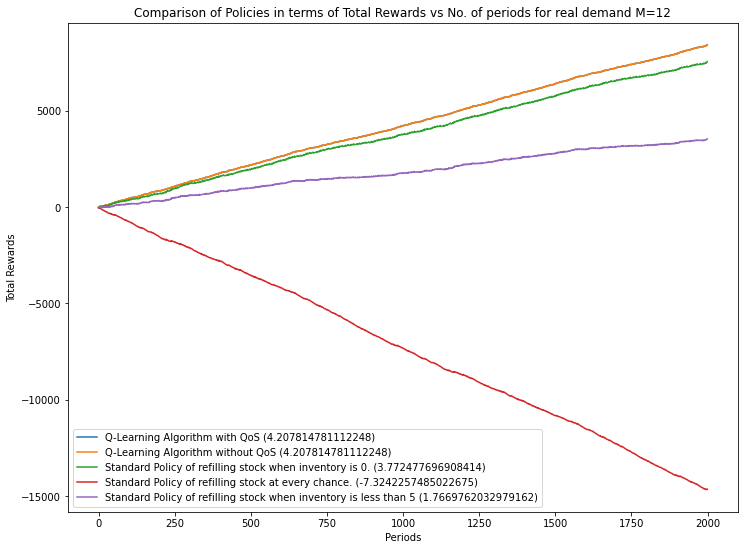

In [23]:
df.plot(xlabel="Periods",ylabel="Total Rewards", figsize=(12,9),
        title='Comparison of Policies in terms of Total Rewards vs No. of periods for real demand M={}'.format(M))